In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')
import numpy as np
import os
import re
import operator
import pickle
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer, PorterStemmer
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab/M2/Network/DataNetworkAnalysis.xlsx")

In [ ]:
data

,ID,Title,Content,Venue
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,Monetization as a Motivator for the Freemium E...,The paper describes user behavior as a result ...,arXiv: Computers and Society
1,086c091e-d905-4f1c-9385-eec41ad55723,Towards intelligent distributed computing : ce...,Distributed computing systems are of huge impo...,NaN
2,3089c330-983b-4d83-9b82-fdc7ba8b316c,Changes in Urban Area Discovered by Analysis o...,A period of almost 150 years (since the middle...,NaN
3,328ff460-ca4e-4f83-b100-0b3535b5f30a,A Survey of Social Web Mining Applications for...,The final publication is available at Springer...,NaN
4,38f94267-fdf2-4c45-b930-df351b7fc6a8,Quantized Control and Data-Rate Constraints,This article briefly describes the topic of qu...,NaN
...,...,...,...,...
994,504ef98c-fc58-41cf-bfd9-cb691ab0ffc3,A Rubric to Enrich Student Writing and Underst...,"The importance of effective communication, bot...",NaN
995,505388b0-b20b-42a3-9a0d-be31d7a22e78,Computing Biological Model Parameters by Paral...,Biological models typically depend on many par...,international conference on bioinformatics and...
996,51023dcc-599d-44f8-9cc2-6b216d769336,Robust image hashing with embedding vector var...,We investigate the use of LLE in image hashing...,Digital Signal Processing
997,514105bd-5bd1-49db-a959-48cb99a13722,Migration of Cloud Services and Deliveries to ...,This paper discusses the adoption of cloud com...,NaN


In [ ]:
print("The number of documents is :" , len(data))

The number of documents is : 999


In [ ]:
# Change all the text to lower case.
data['Content']=[entry.lower() for entry in data['Content']]
data['Title']=[entry.lower() for entry in data['Title']]

In [ ]:
def clean_content(text):
    # Remove from to email
    text = re.sub(r'from:(.*\n)', '', text)
    # Remove lines
    text = re.sub(r'lines:(.*\n)', '', text)
    # Remove punctuation except for '-'
    text = re.sub(r'[!"#$%&\'()*+,/:;<=>?@[\\]^_`{|}~]', ' ', text)
    # Replace '-' with ' '
    text = re.sub(r'-', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading and trailing whitespaces
    text = text.strip()

    # Tokenize the text
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Reconstruct the text
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [ ]:
data['Content'] = data['Content'].apply(clean_content)
data['Title'] = data['Title'].apply(clean_content)

In [ ]:
data['Content'] = data['Content'].apply(lambda x: x.strip())  # Strip leading and trailing whitespaces
data = data[data['Content'] != '']  # Remove rows where content is empty

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

In [ ]:
data['Word tokenize']= [word_tokenize(entry) for entry in data['Content']]


In [ ]:
def wordLemmatizer(data):
    tag_map = defaultdict(lambda: wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    file_clean_k = pd.DataFrame(columns=['Keyword_final'])  # Initialize an empty DataFrame

    word_Lemmatized = WordNetLemmatizer()

    for entry in data:
        Final_words = []

        for word, tag in pos_tag(entry):
            if len(word) > 1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
                Final_words.append(word_Final)

        file_clean_k = file_clean_k.append({'Keyword_final': str(Final_words)}, ignore_index=True)

    return file_clean_k


In [ ]:
df_clean = wordLemmatizer(data['Word tokenize'])

<ipython-input-15-f9c50762bc59>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_clean_k = file_clean_k.append({'Keyword_final': str(Final_words)}, ignore_index=True)
<ipython-input-15-f9c50762bc59>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_clean_k = file_clean_k.append({'Keyword_final': str(Final_words)}, ignore_index=True)
<ipython-input-15-f9c50762bc59>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_clean_k = file_clean_k.append({'Keyword_final': str(Final_words)}, ignore_index=True)
<ipython-input-15-f9c50762bc59>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_clean_k = file_clean_k.append({'Keywor

In [ ]:
df_clean

,Keyword_final
0,"['paper', 'describe', 'user', 'behavior', 'res..."
1,"['distribute', 'compute', 'system', 'huge', 'i..."
2,"['period', 'almost', 'year', 'since', 'middle'..."
3,"['final', 'publication', 'available', 'springe..."
4,"['article', 'briefly', 'describe', 'topic', 'q..."
...,...
994,"['importance', 'effective', 'communication', '..."
995,"['biological', 'model', 'typically', 'depend',..."
996,"['investigate', 'use', 'lle', 'image', 'find',..."
997,"['paper', 'discuss', 'adoption', 'cloud', 'com..."


In [ ]:
df_clean=df_clean.replace(to_replace ="\[.", value = '', regex = True)
df_clean=df_clean.replace(to_replace ="'", value = '', regex = True)
df_clean=df_clean.replace(to_replace =" ", value = '', regex = True)
df_clean=df_clean.replace(to_replace ='\]', value = '', regex = True)

In [ ]:
data.insert(loc=3, column='Clean_Keyword', value=df_clean['Keyword_final'].tolist())


In [ ]:
data

,ID,Title,Content,Clean_Keyword,Venue,Word tokenize
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,monetization motivator freemium educational pl...,paper describes user behavior result introduci...,"paper,describe,user,behavior,result,introduce,...",arXiv: Computers and Society,"[paper, describes, user, behavior, result, int..."
1,086c091e-d905-4f1c-9385-eec41ad55723,towards intelligent distributed computing : ce...,distributed computing systems huge importance ...,"distribute,compute,system,huge,importance,numb...",NaN,"[distributed, computing, systems, huge, import..."
2,3089c330-983b-4d83-9b82-fdc7ba8b316c,changes urban area discovered analysis chosen ...,period almost 150 years (since middle 19th cen...,"period,almost,year,since,middle,century,presen...",NaN,"[period, almost, 150, years, (, since, middle,..."
3,328ff460-ca4e-4f83-b100-0b3535b5f30a,survey social web mining applications disease ...,final publication available springer via https...,"final,publication,available,springer,via,http",NaN,"[final, publication, available, springer, via,..."
4,38f94267-fdf2-4c45-b930-df351b7fc6a8,quantized control data rate constraints,article briefly describes topic quan tized con...,"article,briefly,describe,topic,quan,tized,cont...",NaN,"[article, briefly, describes, topic, quan, tiz..."
...,...,...,...,...,...,...
994,504ef98c-fc58-41cf-bfd9-cb691ab0ffc3,rubric enrich student writing understanding,"importance effective communication, written or...","importance,effective,communication,write,oral,...",NaN,"[importance, effective, communication, ,, writ..."
995,505388b0-b20b-42a3-9a0d-be31d7a22e78,computing biological model parameters parallel...,biological models typically depend many parame...,"biological,model,typically,depend,many,paramet...",international conference on bioinformatics and...,"[biological, models, typically, depend, many, ..."
996,51023dcc-599d-44f8-9cc2-6b216d769336,robust image hashing embedding vector variance...,investigate use lle image hashing.we find embe...,"investigate,use,lle,image,find,embed,vector,va...",Digital Signal Processing,"[investigate, use, lle, image, hashing.we, fin..."
997,514105bd-5bd1-49db-a959-48cb99a13722,migration cloud services deliveries higher edu...,paper discusses adoption cloud computing educa...,"paper,discuss,adoption,cloud,compute,education...",NaN,"[paper, discusses, adoption, cloud, computing,..."


In [ ]:
data.to_csv("/content/drive/MyDrive/Colab/M2/Network/df_update.csv", index=False, header=True)

In [ ]:
data.Clean_Keyword[0]

'paper,describe,user,behavior,result,introduce,monetization,freemium,educational,online,platform,monetization,result,alternative,system,growth,mechanism,cause,viral,increase,number,user,give,different,option,user,choose,advantageous,simple,one,system,metric,term,factor,utilized,indicator,system,user,base,growth,weekly,factor,almost,double,result,monetization,introduction,monetization,viral,growth,compete,complementary,mechanism,system,growth'

# **TF-IDF**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')
import numpy as np
import os
import re
import operator
import pickle
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Download NLTK stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab/M2/Network/df_update.csv")

In [ ]:
# Check the initial count of null values
null_count_before = data['Clean_Keyword'].isnull().sum()

# Remove null values from the 'Clean_Keyword' column
data = data.dropna(subset=['Clean_Keyword'])

# Check the count of null values after removal
null_count_after = data['Clean_Keyword'].isnull().sum()

# Calculate the number of nulls removed
nulls_removed = null_count_before - null_count_after

print("Number of nulls removed:", nulls_removed)


Number of nulls removed: 2


In [ ]:
vocabulary = set()

for doc in data.Clean_Keyword:
    vocabulary.update(doc.split(','))

vocabulary = list(vocabulary)

# Intializating the tfIdf model
tfidf = TfidfVectorizer(vocabulary=vocabulary,dtype=np.float32)

# Fit the TfIdf model
tfidf.fit(data.Clean_Keyword)

# Transform the TfIdf model
tfidf_tran=tfidf.transform(data.Clean_Keyword)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [ ]:
#vocabulary_list = list(vocabulary_set)
#print(vocabulary_list[0:10])
vocabulary[0:4]


['bmc', 'cadconstruction', 'optimum', 'transaction']

In [ ]:
# Save model
with open('/content/drive/MyDrive/Colab/M2/Network/model/tfid_model.pkl','wb') as handle:
    pickle.dump(tfidf_tran, handle)

In [ ]:
# Save model
with open('/content/tfid_model.pkl','wb') as handle:
    pickle.dump(tfidf_tran, handle)

In [ ]:
t = pickle.load(open('/content/drive/MyDrive/Colab/M2/Network/model/tfid_model.pkl','rb'))

In [ ]:
t = pickle.load(open('/content/tfid_model.pkl','rb'))

In [ ]:
# Save Vacabulary
with open("/content/drive/MyDrive/Colab/M2/Network/vocabulary_list.txt", "w") as file:
    file.write(str(vocabulary))

In [ ]:
# Save Vacabulary
with open("/content/vocabulary_list.txt", "w") as file:
    file.write(str(vocabulary))

In [ ]:
with open("/content/drive/MyDrive/Colab/M2/Network/vocabulary_list.txt", "r") as file:
    data2 = eval(file.readline())

In [ ]:
with open("/content/vocabulary_list.txt", "r") as file:
    data2 = eval(file.readline())

In [ ]:
data2[:100]

['bmc',
 'cadconstruction',
 'optimum',
 'transaction',
 'unfortunately',
 'ussnahme',
 'plines',
 'group',
 'homodyne',
 'geographically',
 'opsis',
 'endgeraten',
 'ployment',
 'fourth',
 'cirro',
 'enjoyment',
 'drastically',
 'worker',
 'gpp',
 'sicherheit',
 'clearly',
 'annotated',
 'reproducible',
 'responsible',
 'establishes',
 'quantified',
 'tecting',
 'nonparametric',
 'uruk',
 'mgut',
 'facts',
 'february',
 'post',
 'coordi',
 'burstiness',
 'tau',
 'linearity',
 'module',
 'monolithic',
 'economics',
 'team',
 'domination',
 'cryptography',
 'trivial',
 'focus',
 'atomic',
 'multicast',
 'huw',
 'framework',
 'men',
 'phd',
 'die',
 'redundantly',
 'smoothness',
 'rtrm',
 'va',
 'enable',
 'reducethe',
 'albert',
 'relaxation',
 'tomography',
 'unbreakable',
 'dissimilar',
 'phenomena',
 'section',
 'contextualization',
 'completion',
 'srl',
 'bin',
 'italian',
 'oscillation',
 'eventually',
 'con',
 'strike',
 'melc',
 'former',
 'sea',
 'ation',
 'collide',
 'use',
 '

# search keywords

In [ ]:
## Create vector for Query/search keywords
def gen_vector_T(tokens):

    Q = np.zeros((len(vocabulary)))

    x= tfidf.transform(tokens)
    for token in tokens[0].split(','):
        try:
            ind = vocabulary.index(token)
            Q[ind]  = x[0, tfidf.vocabulary_[token]]
        except:
            pass
    return Q

In [ ]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim


In [ ]:
def cosine_similarity_T(k, query):
    #print("Cosine Similarity")
    preprocessed_query = preprocessed_query = re.sub("\W+", " ", query).strip()
    tokens = word_tokenize(str(preprocessed_query))
    q_df = pd.DataFrame(columns=['q_clean'])
    q_df.loc[0,'q_clean'] =tokens
    q_df['q_clean'] =wordLemmatizer(q_df.q_clean)
    q_df=q_df.replace(to_replace ="\[.", value = '', regex = True)
    q_df=q_df.replace(to_replace ="'", value = '', regex = True)
    q_df=q_df.replace(to_replace =" ", value = '', regex = True)
    q_df=q_df.replace(to_replace ='\]', value = '', regex = True)
    #print("\nQuery:", query)
    #print("")
    #print(tokens)

    d_cosines = []

    query_vector = gen_vector_T(q_df['q_clean'])

    for d in tfidf_tran.A:

        d_cosines.append(cosine_sim(query_vector, d))

    out = np.array(d_cosines).argsort()[-k:][::-1]
    #print("")
    d_cosines.sort()
    #print(out)
    a = pd.DataFrame()
    for i,index in enumerate(out):
        a.loc[i,'index'] = str(index)
        a.loc[i,'Title'] = data['Title'][index]
    for j,simScore in enumerate(d_cosines[-k:][::-1]):
        a.loc[j,'Score'] = simScore
    return a

In [ ]:
%time cosine_similarity_T(10,'Software Engineering and systems')


CPU times: user 67.8 ms, sys: 86.8 ms, total: 155 ms
Wall time: 180 ms


<ipython-input-15-f9c50762bc59>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_clean_k = file_clean_k.append({'Keyword_final': str(Final_words)}, ignore_index=True)


,index,Title,Score
0,1,towards intelligent distributed computing : ce...,0.341740
1,309,resource specification prototyping human inten...,0.311154
2,777,gpop: global file popularity measurement unstr...,0.308590
3,867,novel single fuzzy approximation based adaptiv...,0.288796
4,585,towards systematic view cybersecurity ecology,0.287834
5,368,hybrid type ii fuzzy system & data mining appr...,0.275043
6,911,novel approaches using evolutionary computatio...,0.250995
7,787,high resolution leaf area index estimation syn...,0.237027
8,809,interactive effects citalopram serotonin trans...,0.229379
9,835,loyalty programs dynamic consumer preference o...,0.227478


In [ ]:
data.Content[1]

'distributed computing systems huge importance number recently established future functions computer science. example, vital banking applications, communication electronic systems, air trafﬁc control, manufacturing automation, biomedical operation works, space monitoring systems robotics information systems. nature computing comes increasingly directed towards intelligence autonomy, intelligent computations key future applications. intelligent distributed computing become base growth innovative generation intelligent distributed systems. nowadays, research centres require development architectures intelligent collaborated systems; systems must capable solving problems save processing time reduce costs. building intelligent style distributed computing controls whole distributed system requires communications must based completely consistent system. model ideal system adopted building intelligent distributed computing structure human body system, speciﬁcally body’s cells. artiﬁcial virtu

In [ ]:
data.Content[309]

"today's software systems rely heavily complex resources, humans. human intensive systems particularly important society, espe cially healthcare, financial, software development domains. one chal lenge developing systems system design must account constraints, capabilities, allocation policies complex resources, par ticularly humans. resources, capabilities, allocation poli cies constraints need carefully specified, modeled. toward goal supporting design systems make effective use resources, introduce resource specification language process aware, discrete event simulation engine simulates system executions adhering source specifications. simulation supports (1) modeling resources used system, ways used, (2) experimenting different resource capability mixes allocation policies, (3) iden tifying undesirable situations bottlenecks, inefficiencies result mixes policies. joint use detailed resource specifications simulation supports rapid evaluation human intensive system designs. evaluate

In [ ]:
%time cosine_similarity_T(10,'computer vision')


CPU times: user 74.2 ms, sys: 55.4 ms, total: 130 ms
Wall time: 147 ms


<ipython-input-15-f9c50762bc59>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file_clean_k = file_clean_k.append({'Keyword_final': str(Final_words)}, ignore_index=True)


,index,Title,Score
0,963,nonparametric bayesian factor analysis dynamic...,0.281980
1,408,link gaussian homotopy continuation convex env...,0.247326
2,77,overview color name applications computer vision,0.236679
3,166,coarse fine minimization common nonconvexities,0.167245
4,89,chapter three – dataflow computing extreme per...,0.154548
5,147,maximizing flows message passing: computing sp...,0.127133
6,459,relative interval analysis paging algorithms a...,0.112171
7,10,grey energy environmental impacts ict hardware,0.106165
8,339,text data mining techniques adverse drug react...,0.098553
9,522,differentially private state estimation distri...,0.092229


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=bab8f34753caef1b7d51ee6f5f3f255fd22d2b8e840a777505c8ce4bf4db08a1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
import re, string
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel
%matplotlib inline

from gensim.models import Doc2Vec
from collections import namedtuple
import gensim.utils
from langdetect import detect

<ipython-input-46-afe8743b8831>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['doc_len'], hist=True, kde=True, color='b', label='doc len')


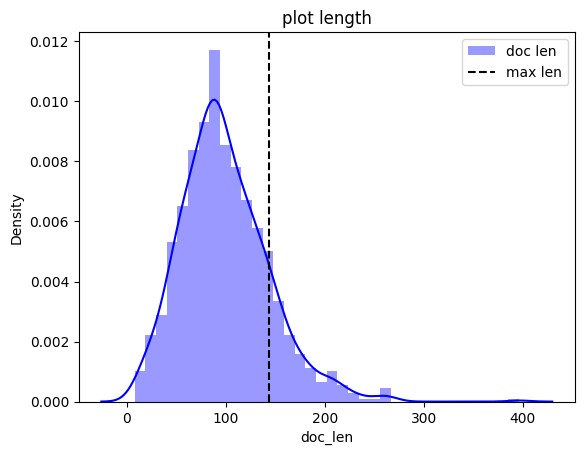

In [ ]:
data['doc_len'] = data['Content'].apply(lambda words: len(words.split()))
max_seq_len = np.round(data['doc_len'].mean() + data['doc_len'].std()).astype(int)
sns.distplot(data['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('plot length'); plt.legend()
plt.show()

In [ ]:
imdbdata= pd.read_excel("/content/drive/MyDrive/Colab/M2/Network/DataNetworkAnalysis.xlsx")
data = np.array(imdbdata.Content)
titles=np.array(imdbdata.Title)

imdbdata.head()

,ID,Title,Content,Venue
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,Monetization as a Motivator for the Freemium E...,The paper describes user behavior as a result ...,arXiv: Computers and Society
1,086c091e-d905-4f1c-9385-eec41ad55723,Towards intelligent distributed computing : ce...,Distributed computing systems are of huge impo...,NaN
2,3089c330-983b-4d83-9b82-fdc7ba8b316c,Changes in Urban Area Discovered by Analysis o...,A period of almost 150 years (since the middle...,NaN
3,328ff460-ca4e-4f83-b100-0b3535b5f30a,A Survey of Social Web Mining Applications for...,The final publication is available at Springer...,NaN
4,38f94267-fdf2-4c45-b930-df351b7fc6a8,Quantized Control and Data-Rate Constraints,This article briefly describes the topic of qu...,NaN


In [ ]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags title original_number')
n=0
alldocs = []

regex = re.compile('[%s]' % re.escape(string.punctuation))

for line_no, line in enumerate(data):
    if (type(line)==str):
        if (len(line)>150):
            if (detect(line) == 'en') :
                line = regex.sub('', line)
                tokens = gensim.utils.to_unicode(line).lower().split()
                words = tokens[0:]
                tags = [n]
                title = titles[line_no]
                alldocs.append(SentimentDocument(words, tags, title, line_no))
                n=n+1

Number of Documents :  977
Mean length of documents :  155.67553735926305


Text(0, 0.5, 'Length of the description')

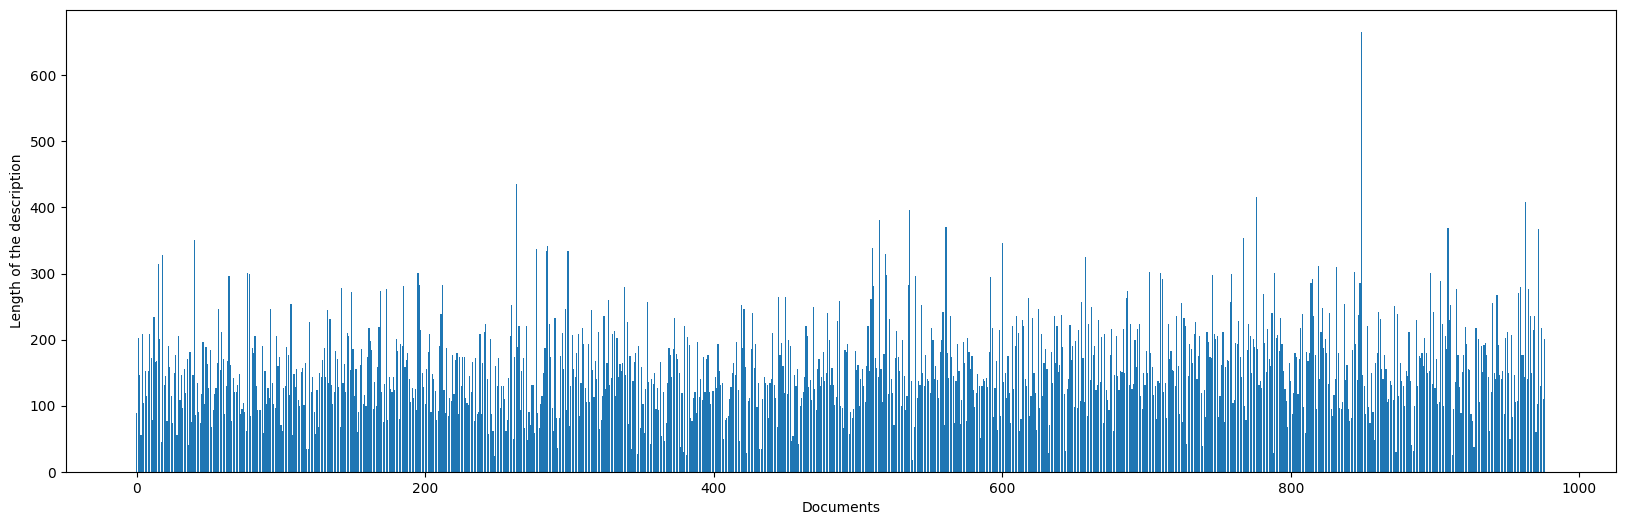

In [ ]:
l = []
for doc in alldocs:
    l.append(len(doc.words))

print('Number of Documents : ', len(alldocs))
print('Mean length of documents : ', np.mean(l))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(l)), l)
plt.xlabel('Documents')
plt.ylabel('Length of the description')

In [ ]:
index = 0
doc = alldocs[index]
print(doc, '\n')
print(data[doc.original_number])

SentimentDocument(words=['the', 'paper', 'describes', 'user', 'behavior', 'as', 'a', 'result', 'of', 'introducing', 'monetization', 'in', 'the', 'freemium', 'educational', 'online', 'platform', 'monetization', 'resulted', 'in', 'alternative', 'system', 'growth', 'mechanisms', 'causing', 'viral', 'increase', 'in', 'the', 'number', 'of', 'users', 'given', 'different', 'options', 'users', 'choose', 'the', 'most', 'advantageous', 'and', 'simple', 'ones', 'for', 'them', 'system', 'metrics', 'in', 'terms', 'of', 'the', 'kfactor', 'was', 'utilized', 'as', 'an', 'indicator', 'of', 'the', 'system', 'user', 'base', 'growth', 'the', 'weekly', 'kfactor', 'almost', 'doubled', 'as', 'a', 'result', 'of', 'monetization', 'introduction', 'monetization', 'and', 'viral', 'growth', 'can', 'be', 'both', 'competing', 'and', 'complementary', 'mechanisms', 'for', 'the', 'system', 'growth'], tags=[0], title='Monetization as a Motivator for the Freemium Educational Platform Growth', original_number=0) 

The pap

# Doc2Vec model

In [ ]:
from gensim.models import Doc2Vec

# PV-DM
model = Doc2Vec(dm=1, vector_size=300, window=10, hs=0, min_count=10, dbow_words=1, sample=1e-5)

# build the vocabulary
model.build_vocab(alldocs)


In [ ]:
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

In [ ]:
model.save("Doc2Vec_model")

In [ ]:
model.wv.most_similar_cosmul(positive = ["information"])


[('challenges', 0.9985293745994568),
 ('internet', 0.9985164403915405),
 ('users', 0.9984644055366516),
 ('technologies', 0.99843430519104),
 ('companies', 0.9984266757965088),
 ('understanding', 0.9984126091003418),
 ('experience', 0.9984105825424194),
 ('media', 0.9983597993850708),
 ('technology', 0.9983510375022888),
 ('community', 0.998313307762146)]

In [ ]:
model.wv.most_similar_cosmul(positive = ["machine"])


[('fast', 0.9992971420288086),
 ('propose', 0.9992908239364624),
 ('prevent', 0.9992847442626953),
 ('achieved', 0.9992818236351013),
 ('very', 0.9992733001708984),
 ('learned', 0.9992659091949463),
 ('therefore', 0.9992564916610718),
 ('art', 0.9992536306381226),
 ('extracted', 0.9992347955703735),
 ('like', 0.9992276430130005)]

In [ ]:
model.wv.most_similar_cosmul(positive = ["computer"])


[('made', 0.9994606971740723),
 ('lack', 0.9994432926177979),
 ('event', 0.9994422197341919),
 ('diverse', 0.9994390606880188),
 ('economic', 0.99942946434021),
 ('visualization', 0.9994169473648071),
 ('introduces', 0.9994162321090698),
 ('recent', 0.9994098544120789),
 ('analyzing', 0.9994049668312073),
 ('describes', 0.9994006156921387)]

In [ ]:
model.wv.most_similar_cosmul(positive = ["information"])


[('challenges', 0.9985293745994568),
 ('internet', 0.9985164403915405),
 ('users', 0.9984644055366516),
 ('technologies', 0.99843430519104),
 ('companies', 0.9984266757965088),
 ('understanding', 0.9984126091003418),
 ('experience', 0.9984105825424194),
 ('media', 0.9983597993850708),
 ('technology', 0.9983510375022888),
 ('community', 0.998313307762146)]

In [ ]:
model.wv.most_similar_cosmul(positive = ["engineering"])


[('integration', 0.9994083642959595),
 ('developing', 0.9994027614593506),
 ('integrated', 0.9993788003921509),
 ('managing', 0.999355673789978),
 ('building', 0.9993518590927124),
 ('focus', 0.9993482232093811),
 ('nowadays', 0.9993320107460022),
 ('become', 0.9993253946304321),
 ('domains', 0.9993252158164978),
 ('methodologies', 0.9993245601654053)]

In [ ]:
model.wv.most_similar_cosmul(positive = ["computer","vision"])


[('difficult', 0.9986226558685303),
 ('art', 0.998538076877594),
 ('event', 0.9985190033912659),
 ('recent', 0.9985109567642212),
 ('popular', 0.9985050559043884),
 ('produce', 0.9984608888626099),
 ('successfully', 0.9984570741653442),
 ('evaluating', 0.9984492063522339),
 ('like', 0.9984378218650818),
 ('introduces', 0.9984302520751953)]

In [ ]:

tokens = "computer vision and image processing"

# Infer a vector for the given text
new_vector = model.infer_vector(tokens.split(), alpha=0.001)

# Find the most similar document vector to the inferred vector
tagsim = model.docvecs.most_similar([new_vector])[0]
docsim = alldocs[tagsim[0] ]
print("ID:", docsim.original_number)
print("Document : ", data[docsim.original_number], "\n")
print("Title : ", docsim.title)
print("Similarity : ", tagsim[1])

ID: 822
Document :  Nowadays robotic researches are concerned about autonomous and robust operation outdoors in order to perform a va- riety of practical applications. Therefore, we present a robotic platform TAPAS designed for autonomous navigation in the man-made environ- ments, like parks, and capable of transporting 5 kg payload. The article presents the hardware design and sensory system that allowed to create a fully autonomous vehicle unique due to its low cost, light weight and long battery duration. Presented solution was already thoroughly evaluated at the international robotic competition Robotour 2014, where TAPAS took ex aequo 4th place out of 13 robots. Taking part in the competition provided feedback that is discussed in the article and will be used for further developments. 

Title :  TAPAS: A Robotic Platform for Autonomous Navigation in Outdoor Environments
Similarity :  0.9989925026893616


<ipython-input-60-669a8a69cf2e>:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  tagsim = model.docvecs.most_similar([new_vector])[0]


In [ ]:
data[docsim.original_number]

'Nowadays robotic researches are concerned about autonomous and robust operation outdoors in order to perform a va- riety of practical applications. Therefore, we present a robotic platform TAPAS designed for autonomous navigation in the man-made environ- ments, like parks, and capable of transporting 5 kg payload. The article presents the hardware design and sensory system that allowed to create a fully autonomous vehicle unique due to its low cost, light weight and long battery duration. Presented solution was already thoroughly evaluated at the international robotic competition Robotour 2014, where TAPAS took ex aequo 4th place out of 13 robots. Taking part in the competition provided feedback that is discussed in the article and will be used for further developments.'

In [ ]:
# closest document to the key words
tokens = "software engineering and systems"

new_vector = model.infer_vector(tokens.split(), alpha=0.001)

# Find the most similar document vectors to the inferred vector
# sims = model.dv.most_similar([new_vector], topn=len(model.dv)) #all documents
sims = model.dv.most_similar([new_vector], topn=3) #Top 10
for idx, sim in sims:
    docsim = alldocs[idx]
    print("ID:", docsim.original_number)
    print("Document:", data[docsim.original_number], "\n")
    print("Title:", docsim.title)
    print("Similarity:", sim)
    print("\n")


ID: 314
Document: There are many technologies for the automation of processes that deal with services; examples are service discovery and composition. Automation of these processes requires that the services are described se- mantically. However, semantically described services are currently not or only rarely available, which limits the applicability of discovery and com- position approaches. The systematic support for creating new semantic services usable by automated technologies is an open problem. We tackle this problem with a template based approach: Domain in- dependent templates are instantiated with domain specific services and boolean expressions. This process yields both the description and the implementation of new services whose correctness directly follows from the correctness of the template. Besides the theory, we present a pre- liminary evaluation for service repositories in which 85% of the services were generated automatically in efficient time and explain why these 

In [ ]:
# closest document to the key words
tokens = "Computer vision"

new_vector = model.infer_vector(tokens.split(), alpha=0.001)

# Find the most similar document vectors to the inferred vector
# sims = model.dv.most_similar([new_vector], topn=len(model.dv)) #all documents
sims = model.dv.most_similar([new_vector], topn=3) #Top 10
for idx, sim in sims:
    docsim = alldocs[idx]
    print("ID:", docsim.original_number)
    print("Document:", data[docsim.original_number], "\n")
    print("Title:", docsim.title)
    print("Similarity:", sim)
    print("\n")

ID: 822
Document: Nowadays robotic researches are concerned about autonomous and robust operation outdoors in order to perform a va- riety of practical applications. Therefore, we present a robotic platform TAPAS designed for autonomous navigation in the man-made environ- ments, like parks, and capable of transporting 5 kg payload. The article presents the hardware design and sensory system that allowed to create a fully autonomous vehicle unique due to its low cost, light weight and long battery duration. Presented solution was already thoroughly evaluated at the international robotic competition Robotour 2014, where TAPAS took ex aequo 4th place out of 13 robots. Taking part in the competition provided feedback that is discussed in the article and will be used for further developments. 

Title: TAPAS: A Robotic Platform for Autonomous Navigation in Outdoor Environments
Similarity: 0.9987251162528992


ID: 661
Document: Purpose#R##N#The purpose of this research was to determine whethe

In [ ]:
import random
# Find similar documents to the randomly chosen one
doc = random.choice(range(len(alldocs)))


sims = model.dv.most_similar(doc, topn=3)

# Print the results
print("Target Document:")
print("ID:", alldocs[doc].original_number)
print("Document:", data[alldocs[doc].original_number], "\n")
print("Similar Documents:")
for idx, sim in sims:
    print("ID:", alldocs[idx].original_number)
    print("Document:", data[alldocs[idx].original_number])
    print("Similarity:", sim)
    print("\n")

Target Document:
ID: 634
Document: In sensor networks, the periodically aggregated data often exhibit high temporal coherency. Huge energy consumption incurred in transmitting these redundant information results in network disconnection thereby leading to service disruption. In order to effectively manage the energy consumption in concurrent data gathering rounds, temporal data prediction model is proposed. The proposed model provides near accurate predictions that successfully restricts redundant transmissions. The communication energy conserved owing to successful predictions helps to increase the number of data cycles considerably. In addition, an energy prediction-based cluster head rotation algorithm is also presented for load balancing within clusters. Experimental outcomes show that the proposed prediction model significantly improves energy conservation by providing successful predictions per data gathering cycle. Results reveal lower magnitude of prediction error as compared t

In [ ]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim import similarities



In [ ]:
dct = Dictionary(doc.words for doc in alldocs)
corpus = [dct.doc2bow(line.words) for line in alldocs]
model_tfidf = TfidfModel(corpus)

In [ ]:
index = 0
print("Document ",index, " : ", data[alldocs[index].original_number] )
print("Bag of words representation of document ", index, " : ", corpus[index])

Document  0  :  The paper describes user behavior as a result of introducing monetization in the freemium educational online platform. Monetization resulted in alternative system growth mechanisms, causing viral increase in the number of users. Given different options, users choose the most advantageous and simple ones for them. System metrics in terms of the K-factor was utilized as an indicator of the system user base growth. The weekly K-factor almost doubled as a result of monetization introduction. Monetization and viral growth can be both competing and complementary mechanisms for the system growth.
Bag of words representation of document  0  :  [(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 4), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 4), (33, 1), (34, 1), (35, 5), (36, 1), (37, 1), (38, 1)

In [ ]:
tokens = "software engineering and systems".split()
index = similarities.MatrixSimilarity([dct.doc2bow(tokens)],num_features=len(dct))

In [ ]:
similarity=np.zeros((len(alldocs)))
maxsim = 0
for id, doc in enumerate(alldocs):
    similarity[id] = index[dct.doc2bow(doc.words)]

docsim= alldocs[np.argmax(similarity)]
print(data[docsim.original_number])
print(tagsim)
print(docsim.title)

<ipython-input-62-82f70b16a868>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity[id] = index[dct.doc2bow(doc.words)]


Innovative software engineering methodologies, concepts and tools which focus on supporting the ongoing evolution of complex software, in particular regarding its continuous adaptation to changing functional and quality requirements as well as platforms over a long period are required. Supporting such a co-evolution of software systems along with their environment represents a very challenging undertaking, as it requires a combination or even integration of approaches and insights from different software engineering disciplines. To meet these challenges, the Priority Programme 1593 Design for Future--Managed Software Evolution has been established, funded by the German Research Foundation, to develop fundamental methodologies and a focused approach for long-living software systems, maintaining high quality and supporting evolution during the whole life cycle. The goal of the priority programme is integrated and focused research in software engineering to develop methods for the continu

# Documents clustering

In [ ]:
# importing tabular data and matrices handlers
import pandas as pd
import numpy as np

# importing the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups

# importing string operations
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# imporitng the convertor
from sklearn.feature_extraction.text import TfidfVectorizer

# importing classification models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# importing clustering models
from sklearn.cluster import KMeans

# importing dimensionality reduction helper
from sklearn.decomposition import PCA

# importing evaluating metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# importing word cloud helper
from wordcloud import WordCloud

# importing visualization packages
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# importing hyperparameter tuning package
from sklearn.model_selection import GridSearchCV

#importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# configuring visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab/M2/Network/DataNetworkAnalysis.xlsx")

In [ ]:
df

,ID,Title,Content,Venue
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,Monetization as a Motivator for the Freemium E...,The paper describes user behavior as a result ...,arXiv: Computers and Society
1,086c091e-d905-4f1c-9385-eec41ad55723,Towards intelligent distributed computing : ce...,Distributed computing systems are of huge impo...,NaN
2,3089c330-983b-4d83-9b82-fdc7ba8b316c,Changes in Urban Area Discovered by Analysis o...,A period of almost 150 years (since the middle...,NaN
3,328ff460-ca4e-4f83-b100-0b3535b5f30a,A Survey of Social Web Mining Applications for...,The final publication is available at Springer...,NaN
4,38f94267-fdf2-4c45-b930-df351b7fc6a8,Quantized Control and Data-Rate Constraints,This article briefly describes the topic of qu...,NaN
...,...,...,...,...
994,504ef98c-fc58-41cf-bfd9-cb691ab0ffc3,A Rubric to Enrich Student Writing and Underst...,"The importance of effective communication, bot...",NaN
995,505388b0-b20b-42a3-9a0d-be31d7a22e78,Computing Biological Model Parameters by Paral...,Biological models typically depend on many par...,international conference on bioinformatics and...
996,51023dcc-599d-44f8-9cc2-6b216d769336,Robust image hashing with embedding vector var...,We investigate the use of LLE in image hashing...,Digital Signal Processing
997,514105bd-5bd1-49db-a959-48cb99a13722,Migration of Cloud Services and Deliveries to ...,This paper discusses the adoption of cloud com...,NaN


In [ ]:
df.columns

Index(['ID', 'Title', 'Content', 'Venue'], dtype='object')

In [ ]:
print("Shape: ", df.shape)

count = df['Content'].str.split().str.len()
print("Average number of words in documents:", np.mean(count))

Shape:  (999, 4)
Average number of words in documents: 153.94994994994994


In [ ]:
def preprocess_content(content):
    """
    Function to preprocess the content of documents which involves removing URL,
    removing special characters, numbers, extra spaces, etc
    """
    content = re.sub(r'\S*https?:\S*', '', content)

    content = re.sub('[^A-Za-z]+', ' ', content)

    tokens = word_tokenize(content)

    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = []
    for token in tokens:
        if token.lower() not in stop_words:
            lemma = lemmatizer.lemmatize(token.lower().strip())
            cleaned_tokens.append(lemma)

    cleaned_content = ' '.join(cleaned_tokens)

    cleaned_content = cleaned_content.lower()

    cleaned_content = cleaned_content.strip()

    return cleaned_content

In [ ]:
df['preprocessed_post'] = df['Content'].apply(preprocess_content)


In [ ]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95)

X_train = vectorizer.fit_transform(df['preprocessed_post'])

X_train = X_train.toarray()

In [ ]:
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

print(inertia)

[964.812881862118, 957.3832649240663, 952.2932958897034, 947.4516650079063, 944.7750558479642]


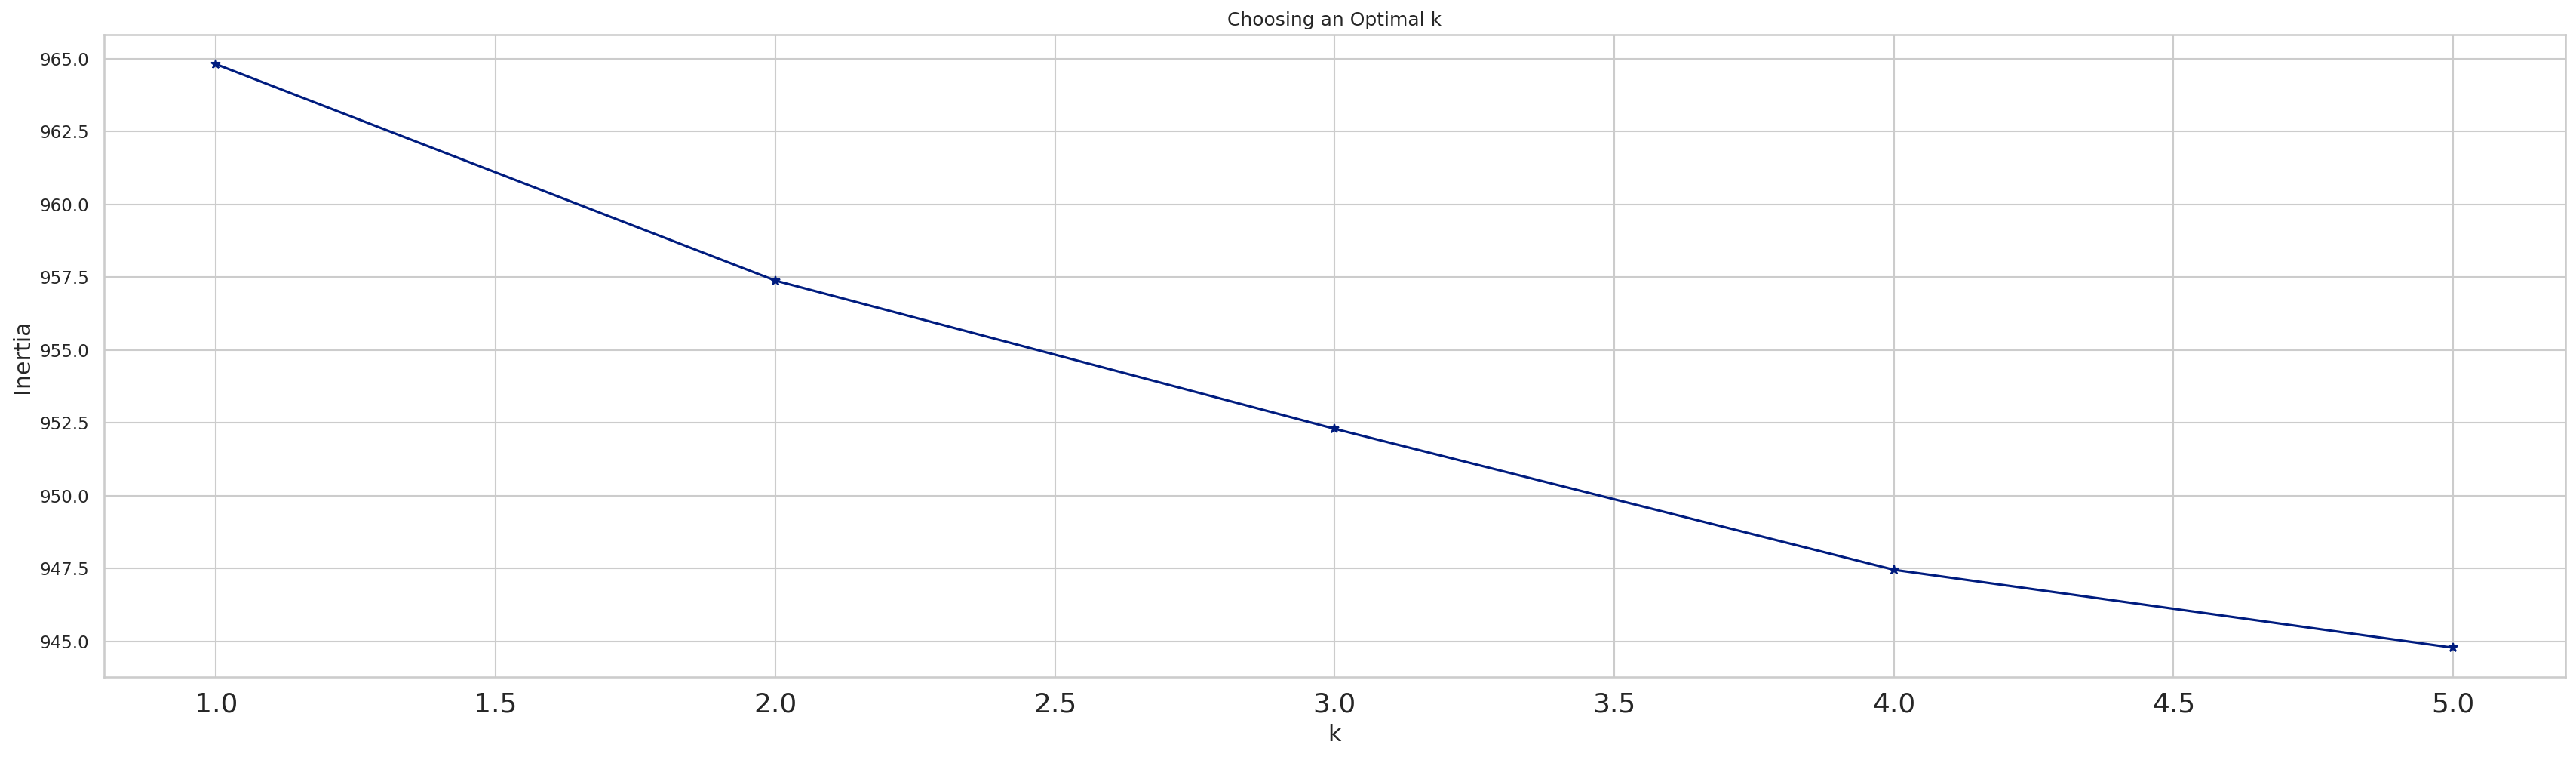

In [ ]:
plt.plot(range(1,6), inertia, '*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Choosing an Optimal k')
plt.show()

In [ ]:
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', max_iter=200, n_init=10)

kmeans.fit(X_train)

KMeans(max_iter=200, n_clusters=4, n_init=10)

In [ ]:
# storing the cluster labels
cluster_label = kmeans.labels_

In [ ]:
cluster_label[:10]

array([3, 2, 2, 2, 3, 1, 2, 1, 3, 2], dtype=int32)

In [ ]:
X_train.shape

(999, 2432)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

component_vectors = pca.fit_transform(X_train)

In [ ]:
component_vectors

array([[-0.08794364, -0.01831936],
       [-0.09678567, -0.04229365],
       [-0.04911998,  0.02855602],
       ...,
       [ 0.14452914, -0.06726985],
       [-0.12385789, -0.01345086],
       [-0.1021408 , -0.09359654]])

In [ ]:
dimension_one = component_vectors[:, 0]
dimension_two = component_vectors[:, 1]

In [ ]:
df_dimension_reduced_cluster = pd.DataFrame({
    'Content': df['Content'],
    'preprocessed_content': df['preprocessed_post'],
    'dimension_one': dimension_one,
    'dimension_two': dimension_two,
    'cluster_label': cluster_label
})

In [ ]:
df_dimension_reduced_cluster


,Content,preprocessed_content,dimension_one,dimension_two,cluster_label
0,The paper describes user behavior as a result ...,paper describes user behavior result introduci...,-0.087944,-0.018319,3
1,Distributed computing systems are of huge impo...,distributed computing system huge importance n...,-0.096786,-0.042294,2
2,A period of almost 150 years (since the middle...,period almost year since middle th century n p...,-0.049120,0.028556,2
3,The final publication is available at Springer...,final publication available springer via,-0.033345,0.048600,2
4,This article briefly describes the topic of qu...,article briefly describes topic quan tized con...,-0.028327,-0.036718,3
...,...,...,...,...,...
994,"The importance of effective communication, bot...",importance effective communication written ora...,-0.133155,0.011101,2
995,Biological models typically depend on many par...,biological model typically depend many paramet...,0.103378,-0.020572,1
996,We investigate the use of LLE in image hashing...,investigate use lle image hashing find embeddi...,0.144529,-0.067270,0
997,This paper discusses the adoption of cloud com...,paper discus adoption cloud computing educatio...,-0.123858,-0.013451,3


In [ ]:
df_dimension_reduced_cluster.cluster_label.unique()

array([3, 2, 1, 0], dtype=int32)

In [ ]:
number_of_terms = 23

df_cluster_group = pd.DataFrame(X_train).groupby(cluster_label).mean()

terms = vectorizer.get_feature_names_out()

for cluster, row in df_cluster_group.iterrows():
    print(f'\nCluster {cluster}:')
    top_terms_indices = np.argsort(row)[-number_of_terms:]
    top_terms = [terms[idx] for idx in top_terms_indices]
    print(', '.join(top_terms))



Cluster 0:
object, sparse, performance, paper, text, color, der, using, word, recognition, video, data, approach, result, die, classification, algorithm, model, proposed, based, method, feature, image

Cluster 1:
property, given, two, approach, proposed, based, number, order, numerical, paper, optimization, result, graph, system, time, set, function, equation, solution, method, model, algorithm, problem

Cluster 2:
different, use, work, social, software, concept, tool, development, analysis, design, based, technology, study, paper, project, agent, approach, business, research, service, model, system, process

Cluster 3:
service, power, mobile, application, communication, time, cloud, paper, node, performance, model, protocol, device, security, based, energy, proposed, scheme, system, information, user, network, data


In [ ]:
'''#  clusters mapping
cluster_map = {0: "", 1: "", 2: "", 3: ''}

df_dimension_reduced_cluster['cluster'] = df_dimension_reduced_cluster['cluster_label'].map(cluster_map)'''

'#  clusters mapping\ncluster_map = {0: "", 1: "", 2: "", 3: \'\'}\n\ndf_dimension_reduced_cluster[\'cluster\'] = df_dimension_reduced_cluster[\'cluster_label\'].map(cluster_map)'

<Axes: xlabel='dimension_one', ylabel='dimension_two'>

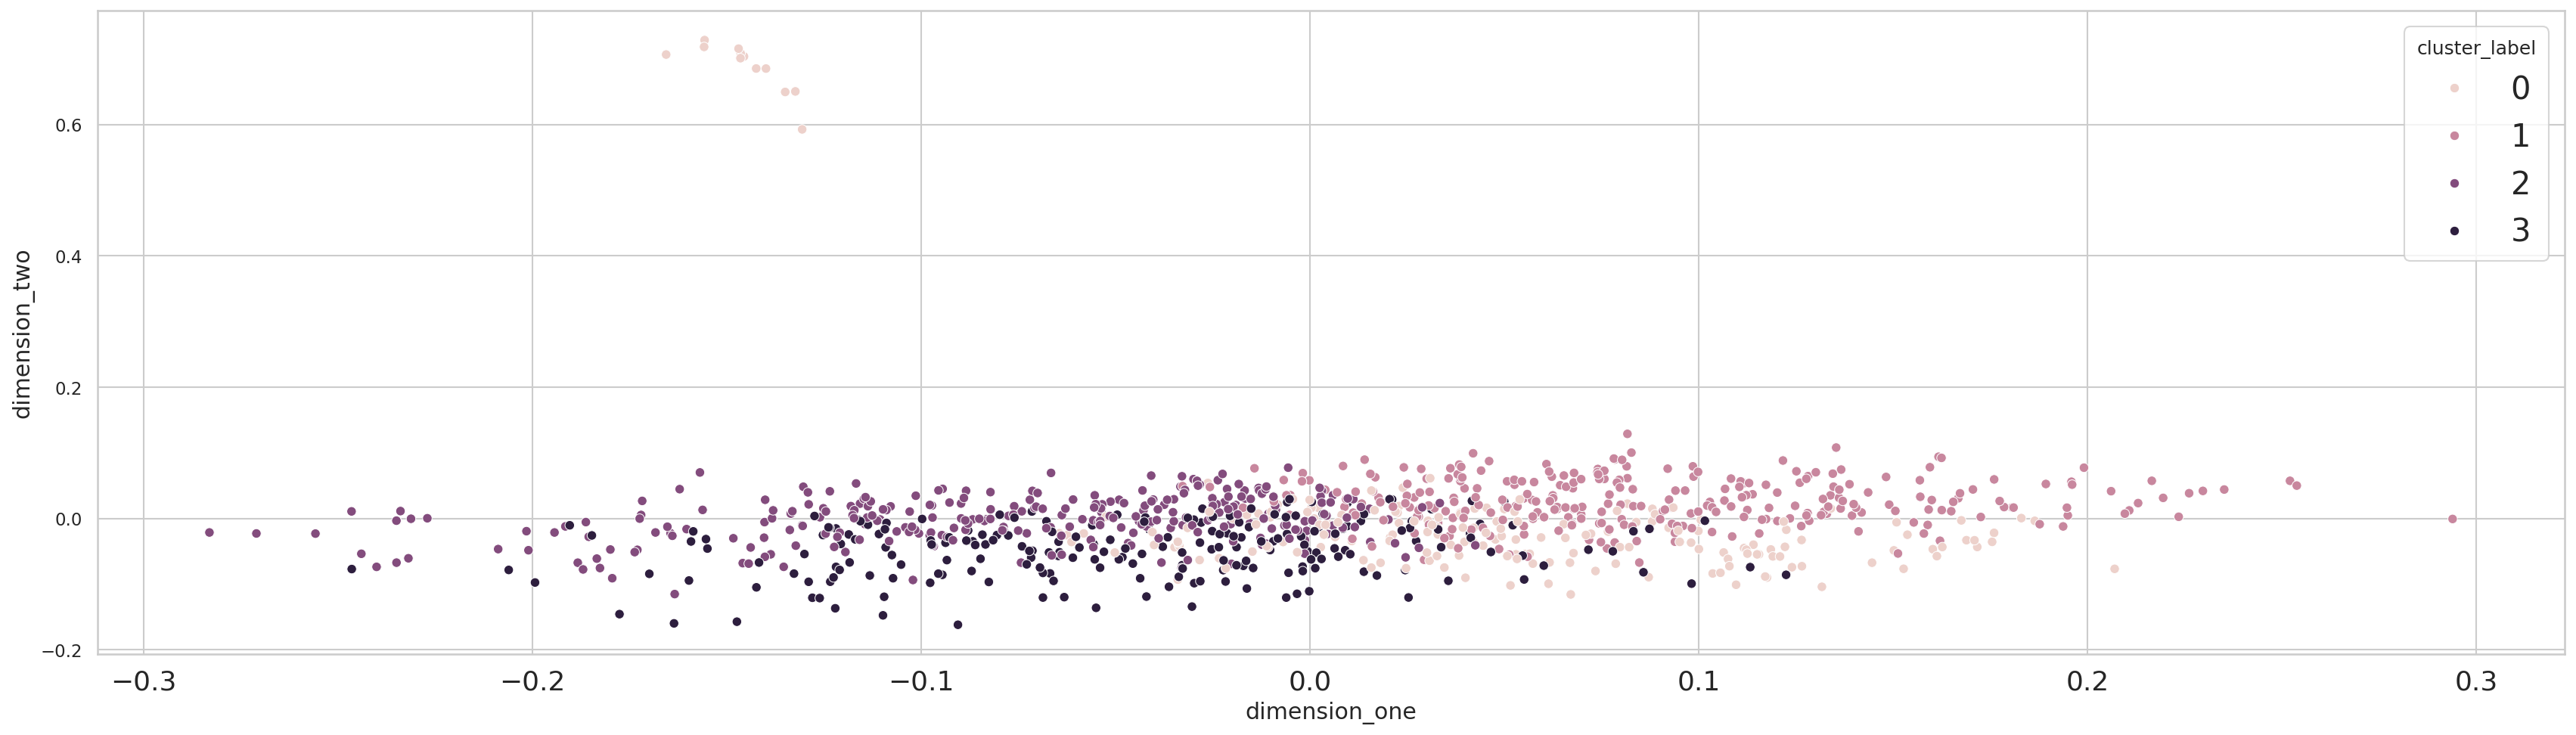

In [ ]:
sns.scatterplot(data=df_dimension_reduced_cluster, x='dimension_one', y='dimension_two', hue='cluster_label')


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab/M2/Network/dataNetworkwithClasses.xlsm")

In [ ]:
df

,ID,Title,Content,Venue,Class
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,Monetization as a Motivator for the Freemium E...,The paper describes user behavior as a result ...,arXiv: Computers and Society,Cyberscience and Social Networks
1,086c091e-d905-4f1c-9385-eec41ad55723,Towards intelligent distributed computing : ce...,Distributed computing systems are of huge impo...,NaN,NaN
2,3089c330-983b-4d83-9b82-fdc7ba8b316c,Changes in Urban Area Discovered by Analysis o...,A period of almost 150 years (since the middle...,NaN,NaN
3,328ff460-ca4e-4f83-b100-0b3535b5f30a,A Survey of Social Web Mining Applications for...,The final publication is available at Springer...,NaN,NaN
4,38f94267-fdf2-4c45-b930-df351b7fc6a8,Quantized Control and Data-Rate Constraints,This article briefly describes the topic of qu...,NaN,NaN
...,...,...,...,...,...
994,504ef98c-fc58-41cf-bfd9-cb691ab0ffc3,A Rubric to Enrich Student Writing and Underst...,"The importance of effective communication, bot...",NaN,NaN
995,505388b0-b20b-42a3-9a0d-be31d7a22e78,Computing Biological Model Parameters by Paral...,Biological models typically depend on many par...,international conference on bioinformatics and...,Information and Communication Technologies (ICT)
996,51023dcc-599d-44f8-9cc2-6b216d769336,Robust image hashing with embedding vector var...,We investigate the use of LLE in image hashing...,Digital Signal Processing,NaN
997,514105bd-5bd1-49db-a959-48cb99a13722,Migration of Cloud Services and Deliveries to ...,This paper discusses the adoption of cloud com...,NaN,NaN


In [ ]:
df.dropna(subset=['Class'], inplace=True)

In [ ]:
df.shape

(250, 5)

In [ ]:
df.columns

Index(['ID', 'Title', 'Content', 'Venue', 'Class'], dtype='object')

In [ ]:
df['Class'].unique()

array(['Cyberscience and Social Networks',
       'Artificial Intelligence and Machine Learning',
       'Information and Communication Technologies (ICT)',
       'Theoretical and Fundamental Computer Science',
       'Software Engineering and Systems',
       'Computer Vision and Image Processing',
       'Robotics and Embedded Systems'], dtype=object)

In [ ]:
categories = ['Cyberscience and Social Networks',
              'Artificial Intelligence and Machine Learning',
              'Information and Communication Technologies (ICT)',
              'Theoretical and Fundamental Computer Science',
              'Software Engineering and Systems',
              'Computer Vision and Image Processing',
              'Robotics and Embedded Systems']

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Content'].values
y = df['Class'].values

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)


In [ ]:
print("Total training data:", len(X_train))
print("Total testing data:", len(X_test))

Total training data: 200
Total testing data: 50


In [ ]:
def count_per_class(training_data, categories_column):
    """
    Function to return the number of documents per class
    """
    class_count = {}
    for category in categories_column.unique():
        count = (training_data[training_data['Class'] == category]).shape[0]
        class_count[category] = count
    return class_count

# Viewing the count of documents per category
count_per_category = count_per_class(df, df['Class'])
print(count_per_category)

{'Cyberscience and Social Networks': 14, 'Artificial Intelligence and Machine Learning': 40, 'Information and Communication Technologies (ICT)': 80, 'Theoretical and Fundamental Computer Science': 46, 'Software Engineering and Systems': 29, 'Computer Vision and Image Processing': 30, 'Robotics and Embedded Systems': 11}


In [ ]:
def count_per_class(training_data, categories_column):
    """
    Function to return the number of documents per class for training data only
    """
    class_count = {}
    for category in categories_column.unique():
        count = (training_data[training_data['Class'] == category]).shape[0]
        class_count[category] = count
    return class_count

# Viewing the count of documents per category for training data
count_per_category_train = count_per_class(pd.DataFrame({'Content': X_train, 'Class': y_train}), pd.Series(y_train))
print(count_per_category_train)



{'Information and Communication Technologies (ICT)': 64, 'Software Engineering and Systems': 23, 'Theoretical and Fundamental Computer Science': 37, 'Artificial Intelligence and Machine Learning': 32, 'Robotics and Embedded Systems': 9, 'Computer Vision and Image Processing': 24, 'Cyberscience and Social Networks': 11}


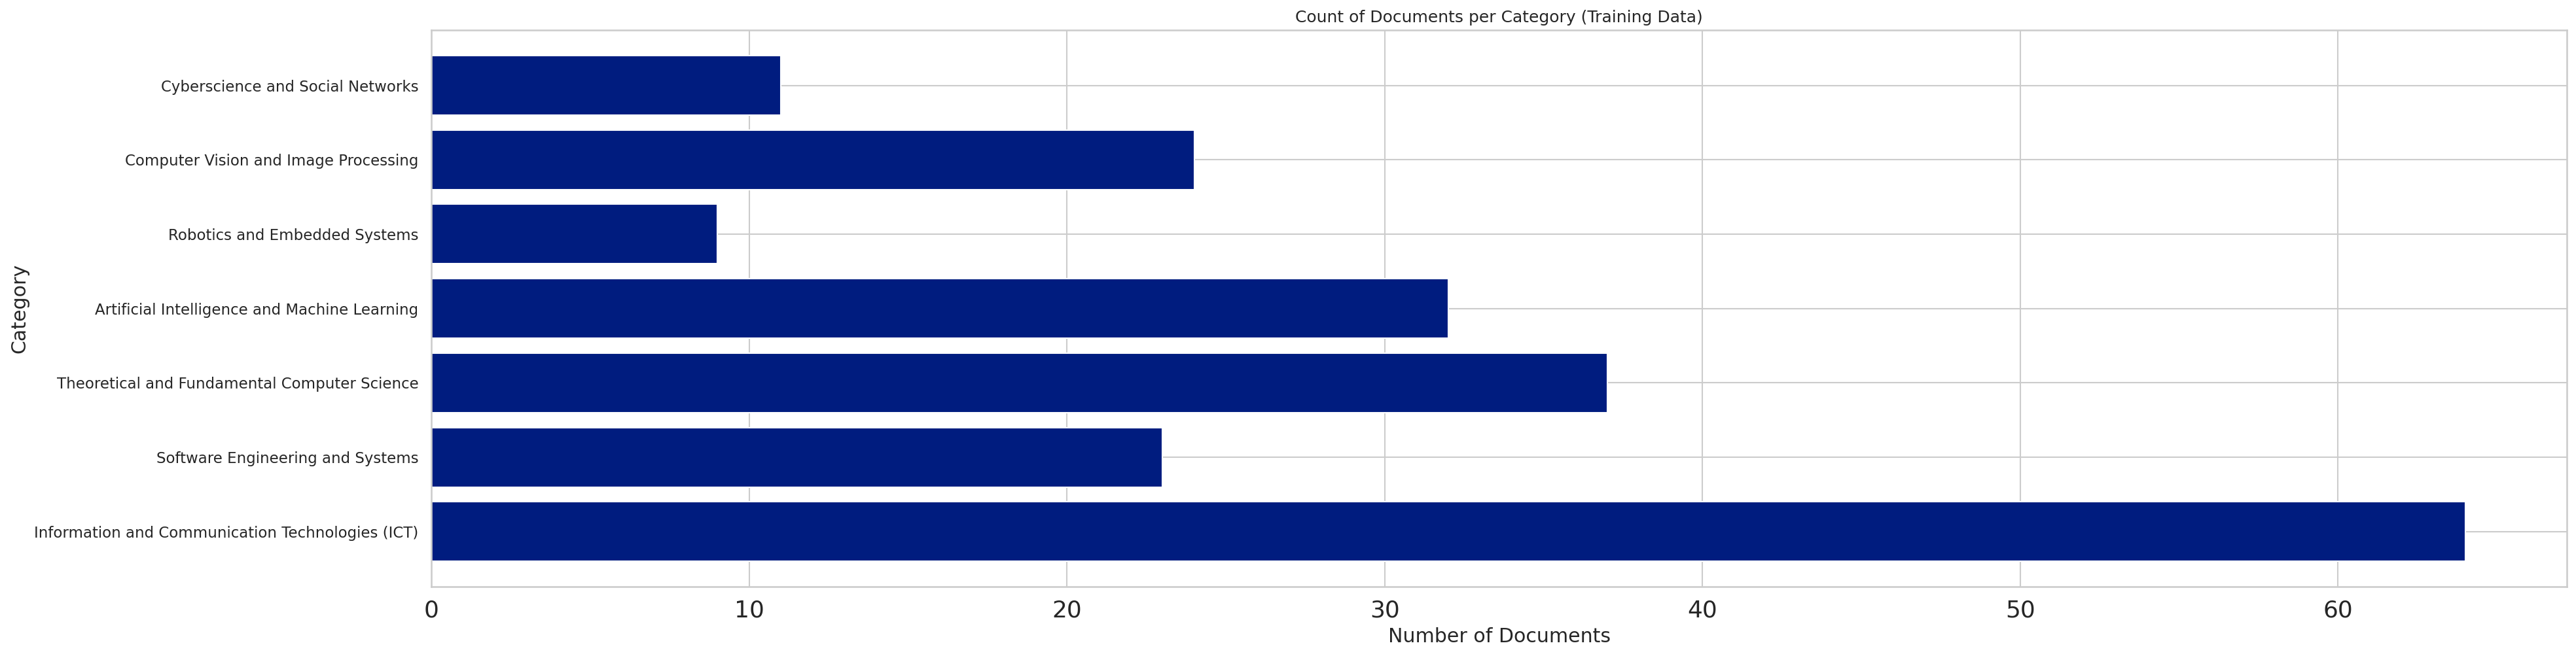

In [ ]:
category_train = list(count_per_category_train.keys())
count_train = list(count_per_category_train.values())
plt.barh(range(len(count_per_category_train)), count_train, tick_label=category_train)
plt.xlabel('Number of Documents')
plt.ylabel('Category')
plt.title('Count of Documents per Category (Training Data)')
plt.show()

In [ ]:
# Accessing the features and target
X_train_data = pd.DataFrame(X_train, columns=["post"])
y_train = pd.DataFrame(y_train, columns=["target"])
X_test_data = pd.DataFrame(X_test, columns=["post"])
y_test = pd.DataFrame(y_test, columns=["target"])


In [ ]:
X_train_data

,post
0,We propose without loss of generality strategi...
1,Sharing of open government data is amongst oth...
2,Infrastructure as a Service IaaS cloud provide...
3,Complex networks have become increasingly popu...
4,Despite the availability of technological reso...
...,...
195,This paper proposes a novel method for visuali...
196,"In this paper, we propose a subMarkov random w..."
197,Understanding complex mammalian biology depend...
198,"Augmented reality based on projection, called ..."


In [ ]:
def preprocess_post(post):
  """
  Function to preprocess the post which involves removing URL,
  removing special characters, numbers, extra spaces, etc
  """
  post = re.sub(r'\S*https?:\S*', '', post)
  post = re.sub('[^A-Za-z]+', ' ', post)

  altered_post_words = []
  for word in post.split():
    if word.lower() not in stopwords.words("english"):
      altered_post_words.append(word)

  post = ' '.join(altered_post_words)

  post = post.lower()

  post = post.strip()

  return post

In [ ]:
X_train_data['preprocessed_post'] = X_train_data['post'].apply(lambda x: preprocess_post(x))

In [ ]:
X_train_data

,post,preprocessed_post
0,We propose without loss of generality strategi...,propose without loss generality strategies ach...
1,Sharing of open government data is amongst oth...,sharing open government data amongst reasons h...
2,Infrastructure as a Service IaaS cloud provide...,infrastructure service iaas cloud provides acc...
3,Complex networks have become increasingly popu...,complex networks become increasingly popular m...
4,Despite the availability of technological reso...,despite availability technological resources n...
...,...,...
195,This paper proposes a novel method for visuali...,paper proposes novel method visualizing thickn...
196,"In this paper, we propose a subMarkov random w...",paper propose submarkov random walk subrw labe...
197,Understanding complex mammalian biology depend...,understanding complex mammalian biology depend...
198,"Augmented reality based on projection, called ...",augmented reality based projection called spat...


In [ ]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95)

# applying the vectorizer to the preprocessed posts
X_train = vectorizer.fit_transform(X_train_data['preprocessed_post'])
X_test = vectorizer.transform(X_test_data['post'])

In [ ]:
X_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0915737 ,
        0.        ],
       [0.        , 0.12754792, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12059935, ..., 0.        , 0.10837684,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
classification_models = ['K Nearest Neighbor', 'K Nearest Neighbor Hypertuned', 'Support Vector Machine', 'Support Vector Machine Hypertuned', 'Multinomial Naive Bayes', 'Multinomial Naive Bayes Hypertuned']


In [ ]:
all_category_train_accuracy = []
all_category_test_accuracy = []
# initializing lists to track performance metrics
all_precision_score = []
all_recall_score = []
all_f1_score = []


In [ ]:
all_knn_clf = KNeighborsClassifier(n_neighbors=4)
all_knn_clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
# calculating training accuracy
all_knn_train_prediction = all_knn_clf.predict(X_train)
all_knn_train_accuracy = accuracy_score(y_train,all_knn_train_prediction)
print("Training Accuracy:", all_knn_train_accuracy*100)
all_category_train_accuracy.append(all_knn_train_accuracy)

# calculating testing accuracy
all_knn_test_prediction = all_knn_clf.predict(X_test)
all_knn_test_accuracy = accuracy_score(y_test, all_knn_test_prediction)
print("Testing Accuracy:", all_knn_test_accuracy*100)
all_category_test_accuracy.append(all_knn_test_accuracy)


Training Accuracy: 65.5
Testing Accuracy: 32.0


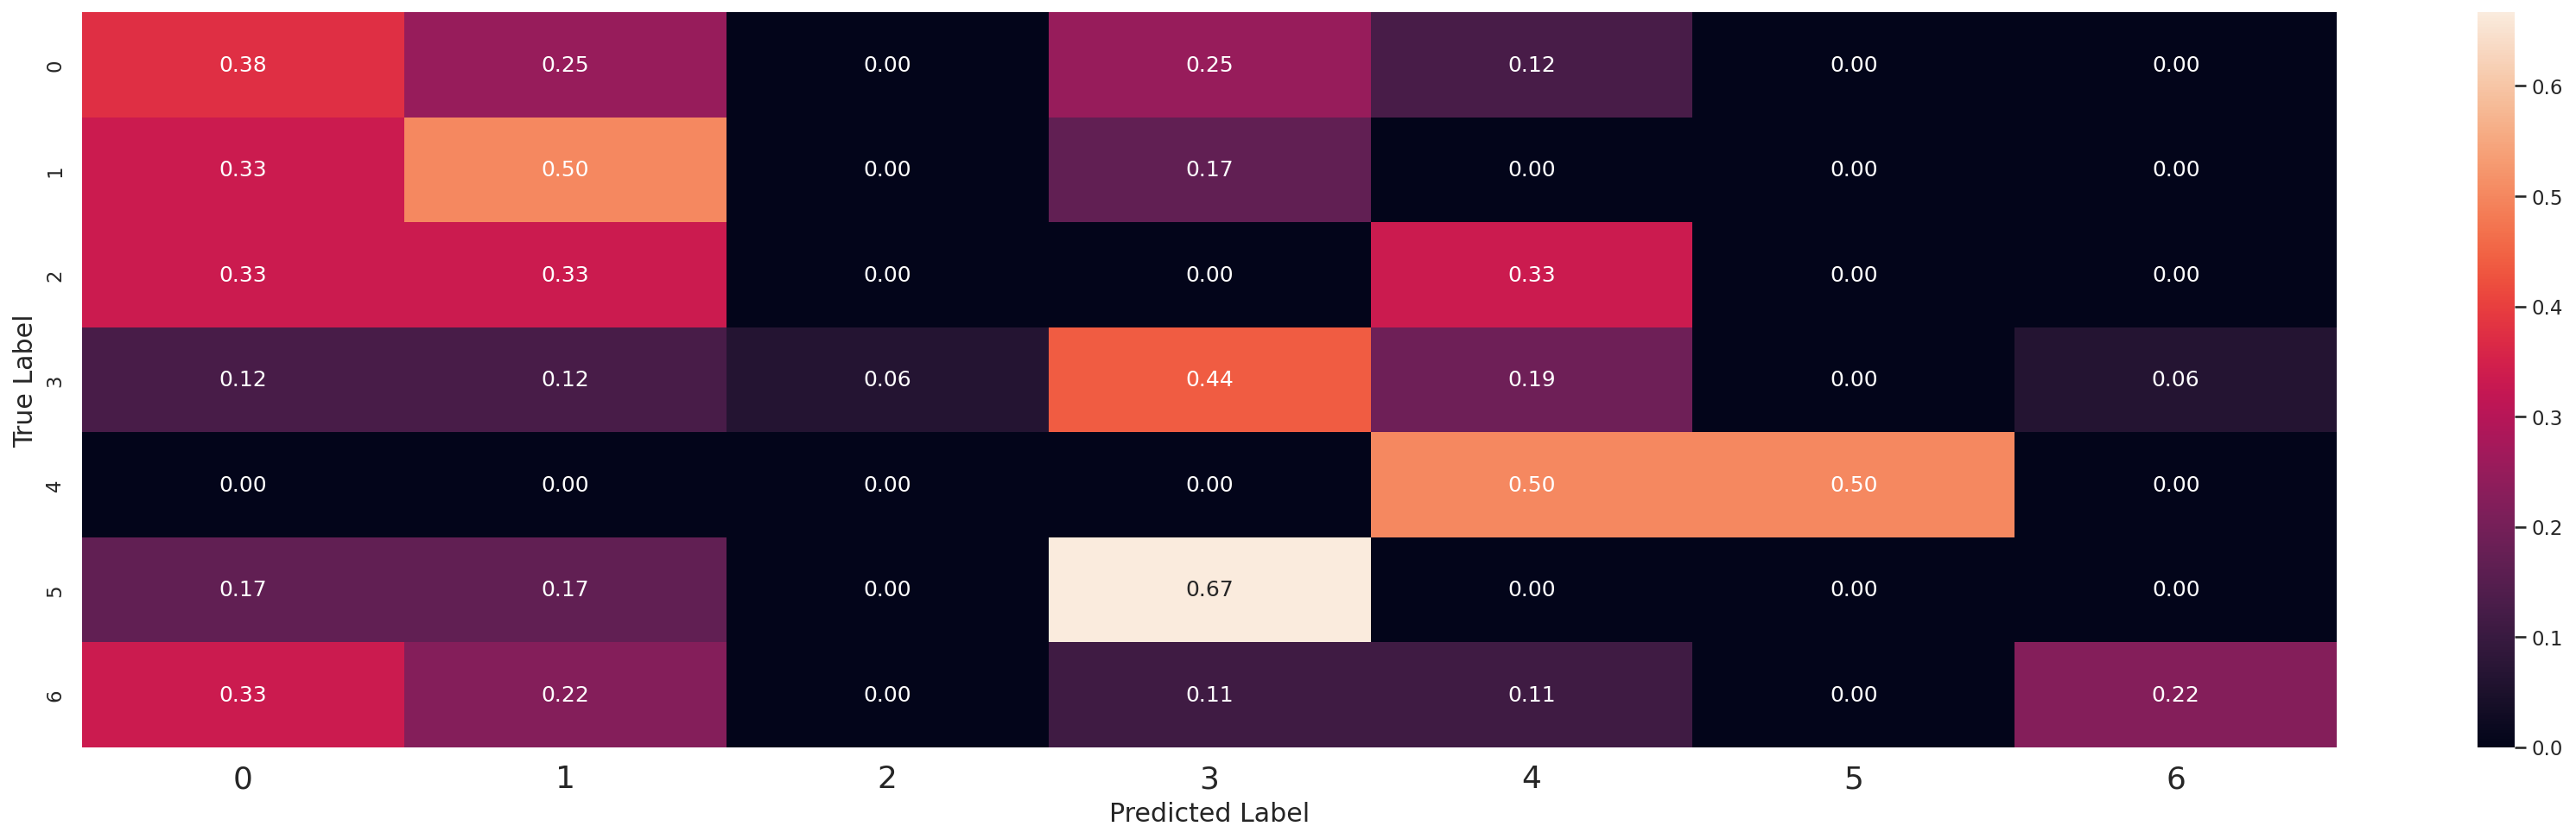

In [ ]:
all_knn_conf_matrix = confusion_matrix(y_test, all_knn_test_prediction)
# normalising and viewing the confusion matrix
all_knn_conf_matrix_norm = all_knn_conf_matrix.astype('float') / all_knn_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(all_knn_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');


In [ ]:
all_knn_metrics = metrics.classification_report(y_test, all_knn_test_prediction,target_names=categories)
print(all_knn_metrics)

                                                  precision    recall  f1-score   support

                Cyberscience and Social Networks       0.25      0.38      0.30         8
    Artificial Intelligence and Machine Learning       0.27      0.50      0.35         6
Information and Communication Technologies (ICT)       0.00      0.00      0.00         3
    Theoretical and Fundamental Computer Science       0.47      0.44      0.45        16
                Software Engineering and Systems       0.14      0.50      0.22         2
            Computer Vision and Image Processing       0.00      0.00      0.00         6
                   Robotics and Embedded Systems       0.67      0.22      0.33         9

                                        accuracy                           0.32        50
                                       macro avg       0.26      0.29      0.24        50
                                    weighted avg       0.35      0.32      0.30        50



In [ ]:
neighbour_values=[]
for i in range(1,15):
  neighbour_values.append(i)
weight_values=['uniform', 'distance']
leaf_values = [30,40,50,60]

all_knn_parameters_dict = dict(n_neighbors=neighbour_values, weights=weight_values,leaf_size=leaf_values)
all_knn_grid = GridSearchCV(all_knn_clf, all_knn_parameters_dict, cv=5, scoring='accuracy')
all_knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'leaf_size': [30, 40, 50, 60],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(all_knn_grid.best_params_)

{'leaf_size': 30, 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
all_knn_ht_clf = KNeighborsClassifier(n_neighbors=1,weights='uniform',leaf_size=30)
all_knn_ht_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
all_knn_ht_train_prediction = all_knn_ht_clf.predict(X_train)
all_knn_ht_train_accuracy = accuracy_score(y_train,all_knn_ht_train_prediction)
print("Training Accuracy with tuned Hyperparameters:",all_knn_ht_train_accuracy*100)
all_category_train_accuracy.append(all_knn_ht_train_accuracy)

# recalculating testing accuracy
all_knn_ht_test_prediction = all_knn_ht_clf.predict(X_test)
all_knn_ht_test_accuracy = accuracy_score(y_test, all_knn_ht_test_prediction)
print("Testing Accuracy with tuned Hyperparameters:",all_knn_ht_test_accuracy*100)
all_category_test_accuracy.append(all_knn_ht_test_accuracy)


Training Accuracy with tuned Hyperparameters: 100.0
Testing Accuracy with tuned Hyperparameters: 8.0


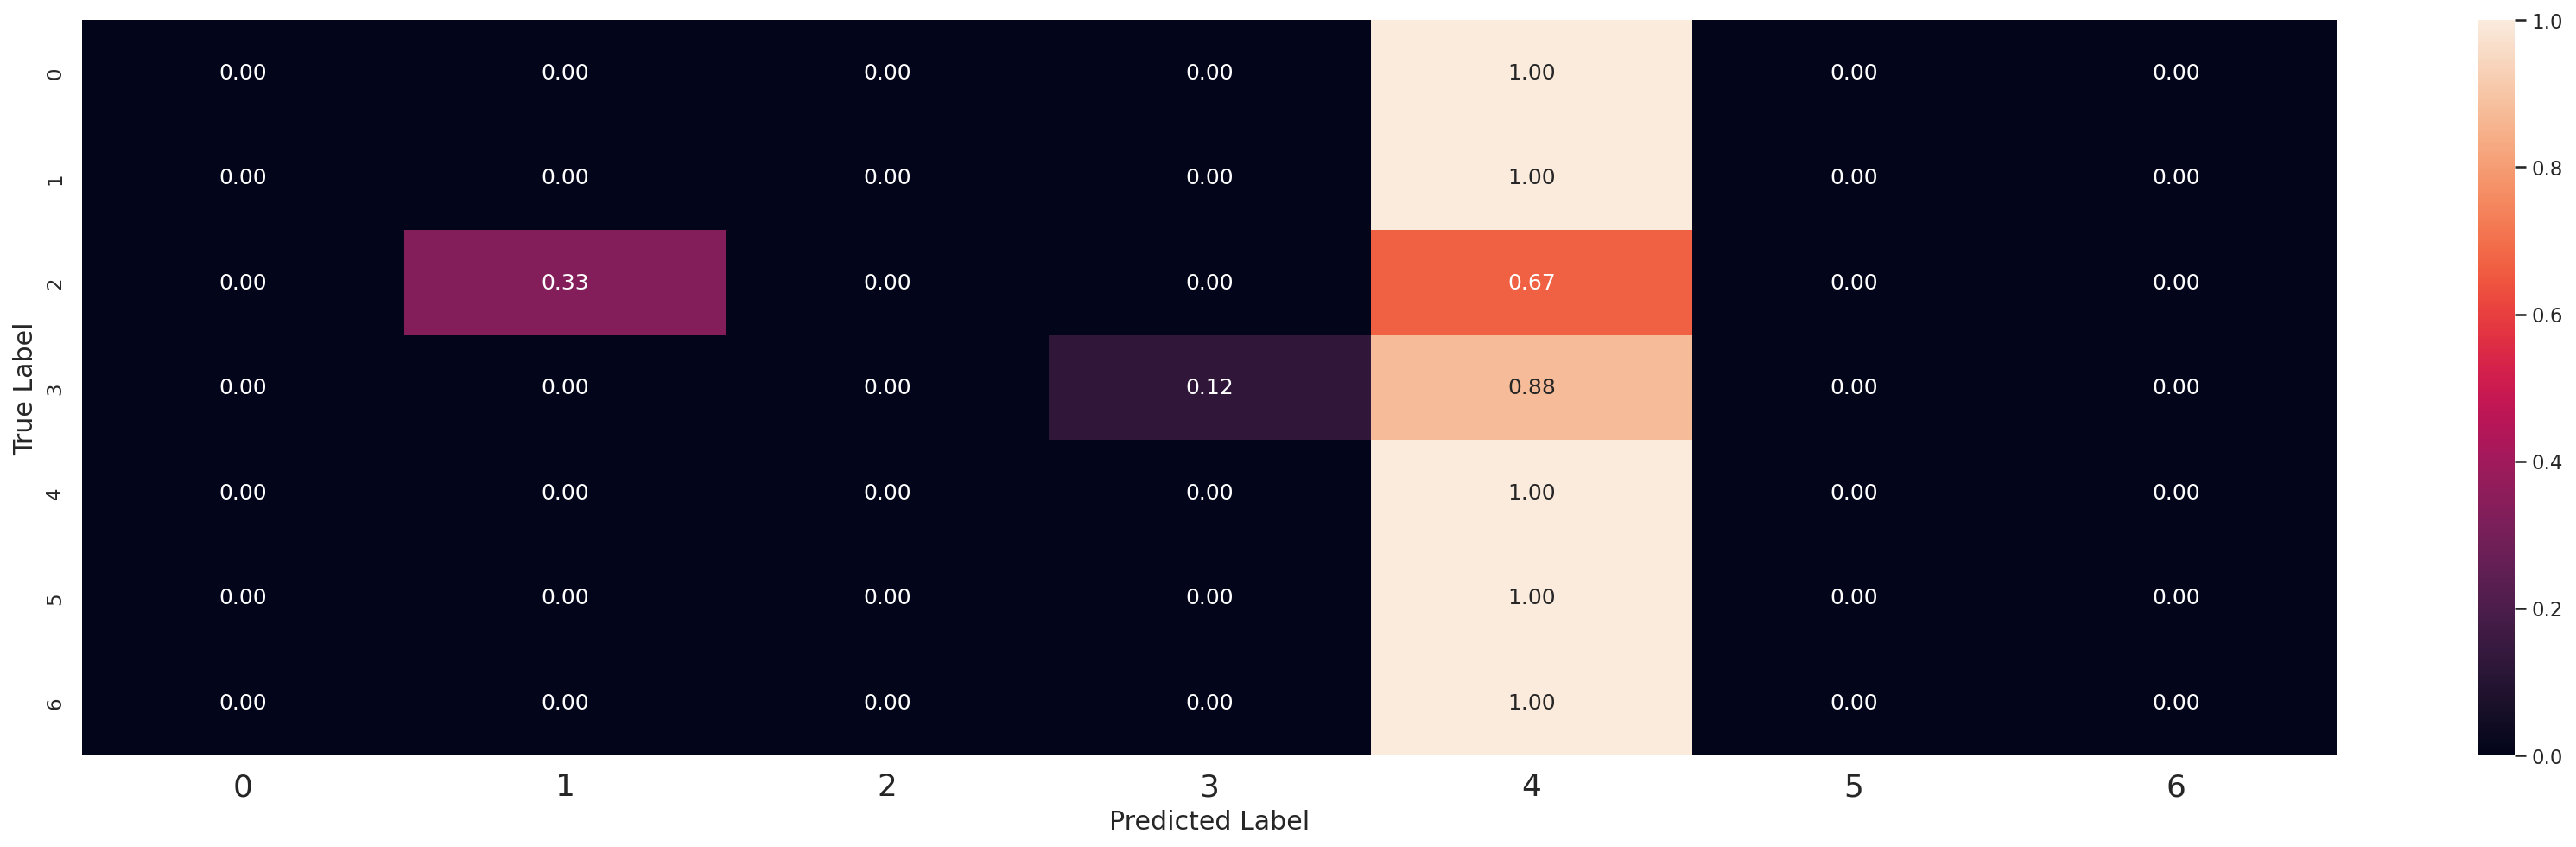

In [ ]:
all_knn_ht_conf_matrix = confusion_matrix(y_test, all_knn_ht_test_prediction)
all_knn_ht_conf_matrix_norm = all_knn_ht_conf_matrix.astype('float') / all_knn_ht_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(all_knn_ht_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');


In [ ]:
all_knn_ht_metrics = metrics.classification_report(y_test, all_knn_ht_test_prediction,target_names=categories)
print(all_knn_ht_metrics)


                                                  precision    recall  f1-score   support

                Cyberscience and Social Networks       0.00      0.00      0.00         8
    Artificial Intelligence and Machine Learning       0.00      0.00      0.00         6
Information and Communication Technologies (ICT)       0.00      0.00      0.00         3
    Theoretical and Fundamental Computer Science       1.00      0.12      0.22        16
                Software Engineering and Systems       0.04      1.00      0.08         2
            Computer Vision and Image Processing       0.00      0.00      0.00         6
                   Robotics and Embedded Systems       0.00      0.00      0.00         9

                                        accuracy                           0.08        50
                                       macro avg       0.15      0.16      0.04        50
                                    weighted avg       0.32      0.08      0.07        50



In [ ]:
all_svm_clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, multi_class='ovr', max_iter=1000)
all_svm_clf.fit(X_train,y_train)


LinearSVC(dual=False)

In [ ]:
all_svm_train_prediction = all_svm_clf.predict(X_train)
all_svm_train_accuracy = accuracy_score(y_train,all_svm_train_prediction)
print("Training Accuracy:",all_svm_train_accuracy*100)
all_category_train_accuracy.append(all_svm_train_accuracy)

# calculating testing accuracy
all_svm_test_prediction = all_svm_clf.predict(X_test)
all_svm_test_accuracy = accuracy_score(y_test, all_svm_test_prediction)
print("Testing Accuracy:",all_svm_test_accuracy*100)
all_category_test_accuracy.append(all_svm_test_accuracy)


Training Accuracy: 99.5
Testing Accuracy: 40.0


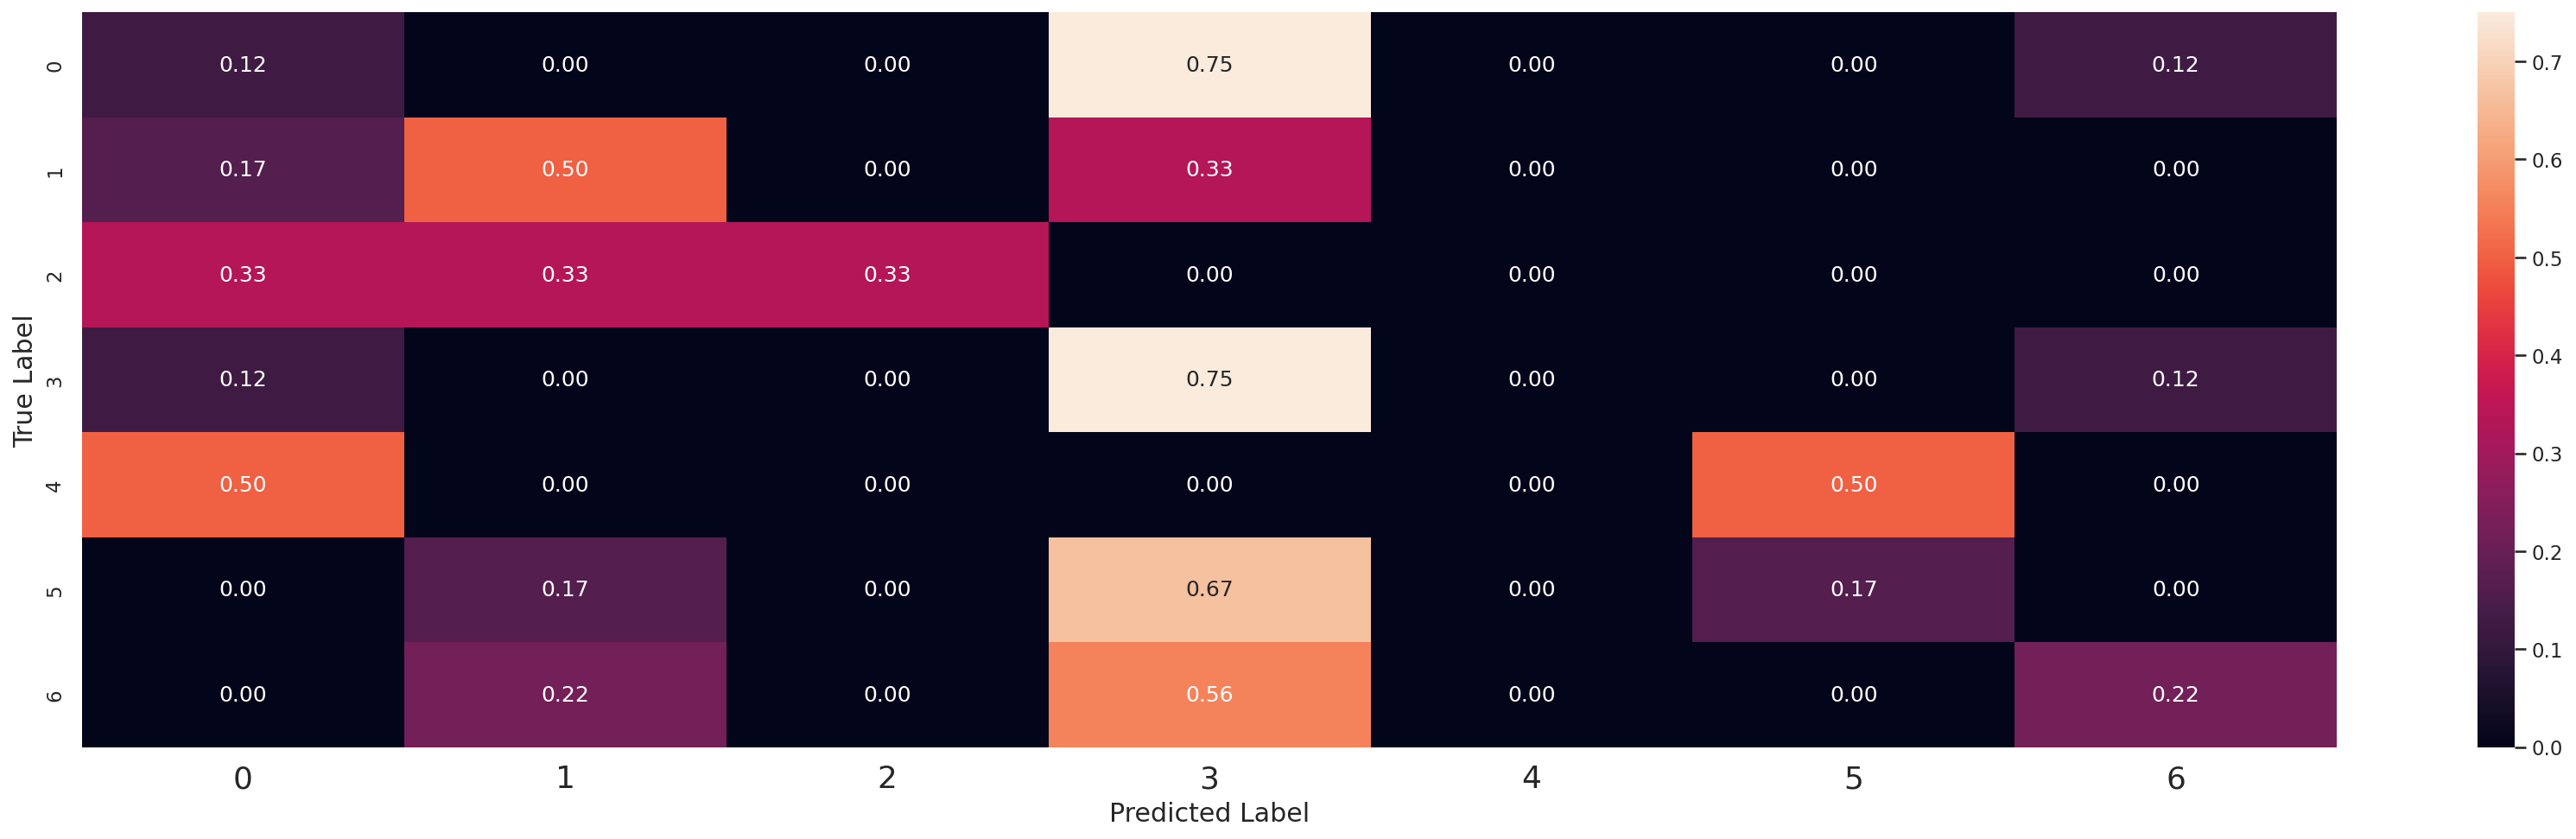

In [ ]:
all_svm_conf_matrix = confusion_matrix(y_test, all_svm_test_prediction)
# normalizing and viewing the confusion matrix
all_svm_conf_matrix_norm = all_svm_conf_matrix.astype('float') / all_svm_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(all_svm_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');


In [ ]:
all_svm_metrics = metrics.classification_report(y_test, all_svm_test_prediction,target_names=categories)
print(all_svm_metrics)


                                                  precision    recall  f1-score   support

                Cyberscience and Social Networks       0.17      0.12      0.14         8
    Artificial Intelligence and Machine Learning       0.43      0.50      0.46         6
Information and Communication Technologies (ICT)       1.00      0.33      0.50         3
    Theoretical and Fundamental Computer Science       0.41      0.75      0.53        16
                Software Engineering and Systems       0.00      0.00      0.00         2
            Computer Vision and Image Processing       0.50      0.17      0.25         6
                   Robotics and Embedded Systems       0.40      0.22      0.29         9

                                        accuracy                           0.40        50
                                       macro avg       0.42      0.30      0.31        50
                                    weighted avg       0.40      0.40      0.36        50



In [ ]:
penalty_values=['l1','l2']
tolerance_values = [0.1,0.001]
C_values=[2,5,10]
all_svm_parameters_dict = dict(penalty=penalty_values, C=C_values, tol=tolerance_values)
all_svm_grid = GridSearchCV(all_svm_clf, all_svm_parameters_dict, cv=5, scoring='accuracy')
all_svm_grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LinearSVC(dual=False),
             param_grid={'C': [2, 5, 10], 'penalty': ['l1', 'l2'],
                         'tol': [0.1, 0.001]},
             scoring='accuracy')

In [ ]:
# viewing the best parameters
print(all_svm_grid.best_params_)


{'C': 10, 'penalty': 'l2', 'tol': 0.1}


In [ ]:
all_svm_ht_clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, multi_class='ovr', max_iter=1000, C=2, tol=0.1)
all_svm_ht_clf.fit(X_train,y_train)


LinearSVC(C=2, dual=False, tol=0.1)

In [ ]:
all_svm_ht_train_prediction = all_svm_ht_clf.predict(X_train)
all_svm_ht_train_accuracy = accuracy_score(y_train,all_svm_ht_train_prediction)
print("Training Accuracy with tuned hyperparameters:",all_svm_ht_train_accuracy*100)
all_category_train_accuracy.append(all_svm_ht_train_accuracy)

# recalculating testing accuracy
all_svm_ht_test_prediction = all_svm_ht_clf.predict(X_test)
all_svm_ht_test_accuracy = accuracy_score(y_test, all_svm_ht_test_prediction)
print("Testing Accuracy with tuned hyperparameters:",all_svm_ht_test_accuracy*100)
all_category_test_accuracy.append(all_svm_ht_test_accuracy)

Training Accuracy with tuned hyperparameters: 99.5
Testing Accuracy with tuned hyperparameters: 38.0


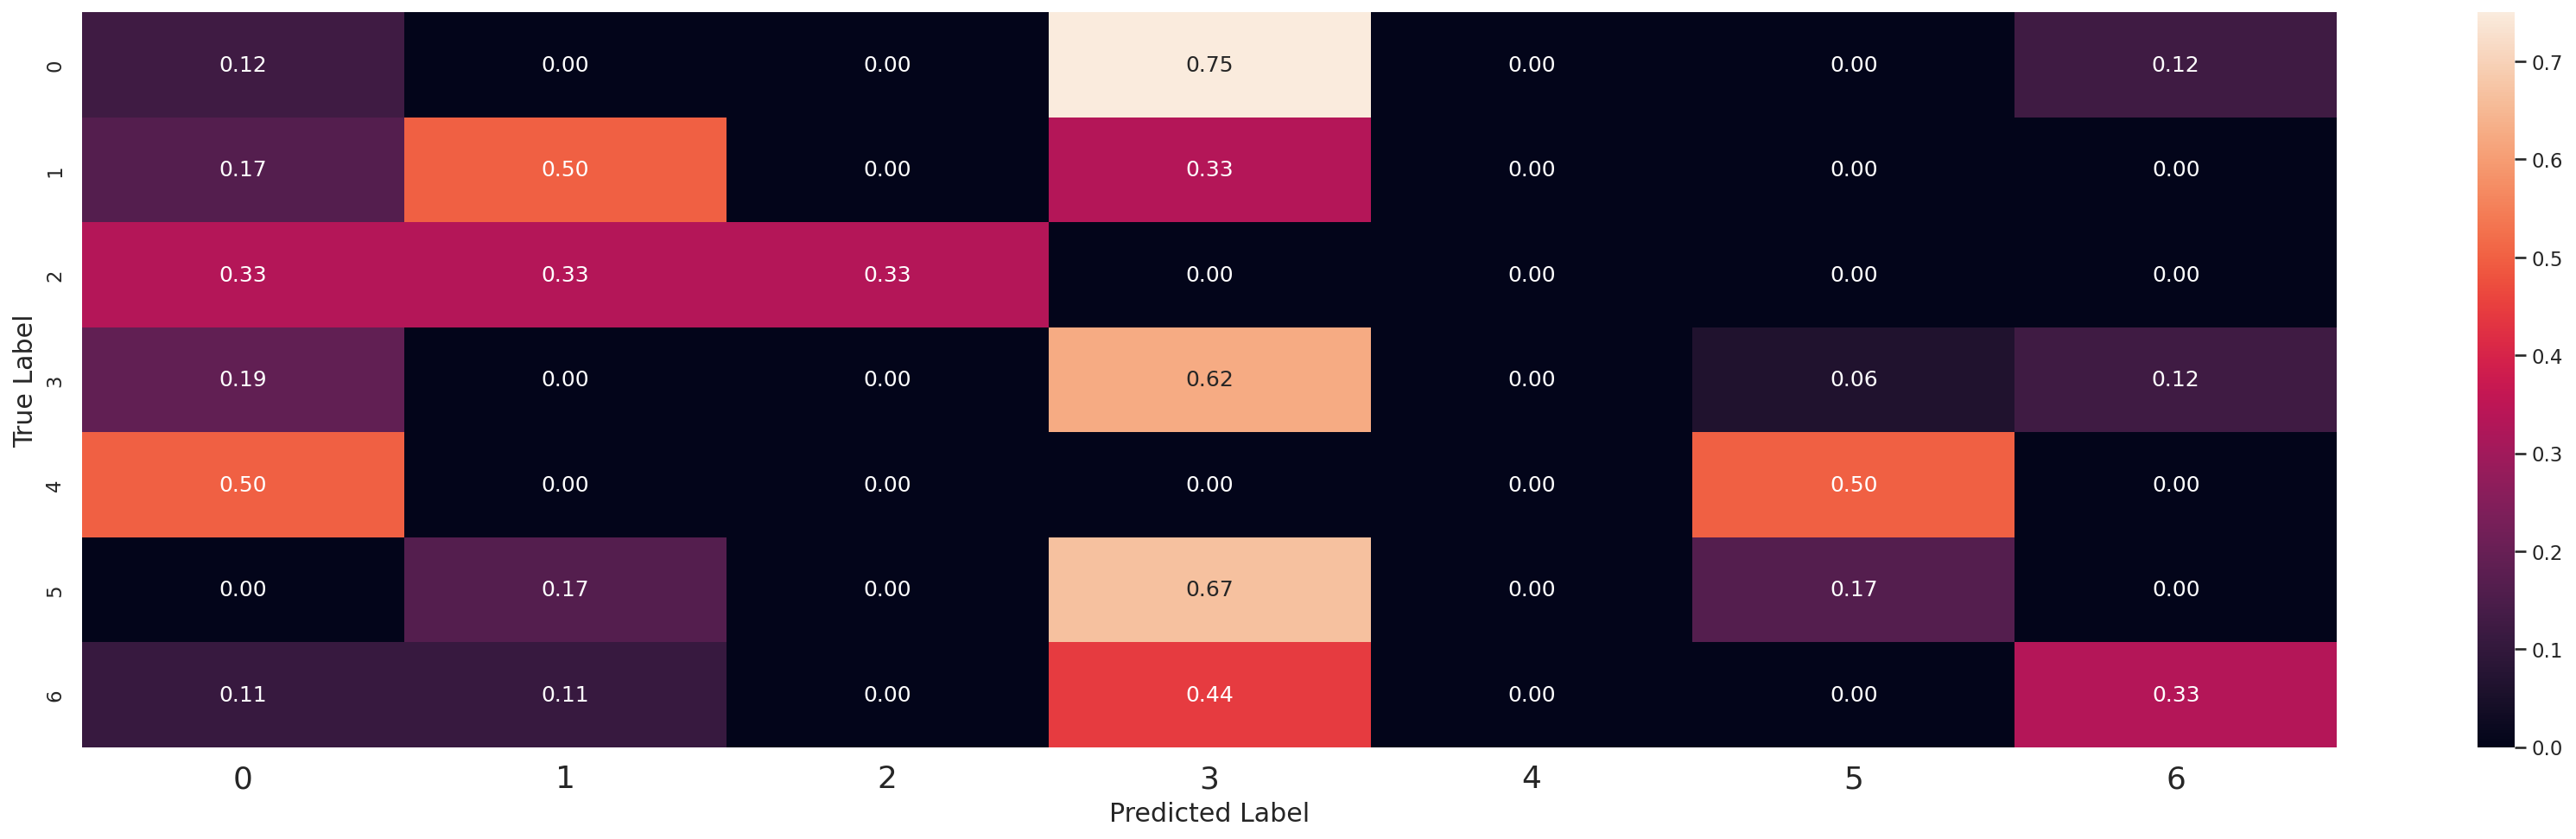

In [ ]:
all_svm_ht_conf_matrix = confusion_matrix(y_test, all_svm_ht_test_prediction)
# renormalizing and reviewing the confusion matrix
all_svm_ht_conf_matrix_norm = all_svm_ht_conf_matrix.astype('float') / all_svm_ht_conf_matrix.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(all_svm_ht_conf_matrix_norm, annot=True,fmt='.2f')
ax.set_xlabel('Predicted Label');
ax.set_ylabel('True Label');


In [ ]:
all_svm_ht_metrics = metrics.classification_report(y_test, all_svm_ht_test_prediction, target_names=categories)
print(all_svm_ht_metrics)


                                                  precision    recall  f1-score   support

                Cyberscience and Social Networks       0.12      0.12      0.12         8
    Artificial Intelligence and Machine Learning       0.50      0.50      0.50         6
Information and Communication Technologies (ICT)       1.00      0.33      0.50         3
    Theoretical and Fundamental Computer Science       0.38      0.62      0.48        16
                Software Engineering and Systems       0.00      0.00      0.00         2
            Computer Vision and Image Processing       0.33      0.17      0.22         6
                   Robotics and Embedded Systems       0.50      0.33      0.40         9

                                        accuracy                           0.38        50
                                       macro avg       0.41      0.30      0.32        50
                                    weighted avg       0.39      0.38      0.36        50



In [ ]:
all_mnb_clf = MultinomialNB(alpha=0.1)
all_mnb_clf.fit(X_train,y_train)


MultinomialNB(alpha=0.1)

In [ ]:
all_mnb_train_prediction = all_mnb_clf.predict(X_train)
all_mnb_train_accuracy = accuracy_score(y_train, all_mnb_train_prediction)
print("Training Accuracy:",all_mnb_train_accuracy*100)
all_category_train_accuracy.append(all_mnb_train_accuracy)

# calculating the testing accuracy
all_mnb_test_prediction = all_mnb_clf.predict(X_test)
all_mnb_test_accuracy= accuracy_score(y_test, all_mnb_test_prediction)
print("Testing Accuracy:",all_mnb_test_accuracy*100)
all_category_test_accuracy.append(all_mnb_test_accuracy)


Training Accuracy: 98.5
Testing Accuracy: 40.0


In [ ]:
all_mnb_metrics = metrics.classification_report(y_test, all_mnb_test_prediction,target_names=categories)
print(all_mnb_metrics)


                                                  precision    recall  f1-score   support

                Cyberscience and Social Networks       0.17      0.12      0.14         8
    Artificial Intelligence and Machine Learning       0.43      0.50      0.46         6
Information and Communication Technologies (ICT)       0.00      0.00      0.00         3
    Theoretical and Fundamental Computer Science       0.39      0.81      0.53        16
                Software Engineering and Systems       0.00      0.00      0.00         2
            Computer Vision and Image Processing       1.00      0.17      0.29         6
                   Robotics and Embedded Systems       0.67      0.22      0.33         9

                                        accuracy                           0.40        50
                                       macro avg       0.38      0.26      0.25        50
                                    weighted avg       0.44      0.40      0.34        50



In [ ]:
alpha_range = [0.0001, 0.001, 0.01, 0.2, 0.5, 0.7, 1, 2, 5, 8, 9, 10]
fit_vals=[True,False]
all_mnb_parameters_dict = dict(alpha=alpha_range,fit_prior=fit_vals)
all_mnb_grid = GridSearchCV(all_mnb_clf, all_mnb_parameters_dict, cv=5, scoring='accuracy')
all_mnb_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(alpha=0.1),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.2, 0.5, 0.7, 1, 2, 5,
                                   8, 9, 10],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [ ]:
all_mnb_grid.best_params_


{'alpha': 1, 'fit_prior': False}

In [ ]:
all_mnb_ht_clf = MultinomialNB(alpha=0.2,fit_prior=False)
all_mnb_ht_clf.fit(X_train,y_train)
all_mnb_ht_train_prediction = all_mnb_ht_clf.predict(X_train)
all_mnb_ht_train_accuracy = accuracy_score(y_train, all_mnb_ht_train_prediction)
print("Training Accuracy with tuned hyperparameters:",all_mnb_ht_train_accuracy*100)
all_category_train_accuracy.append(all_mnb_ht_train_accuracy)

# recalculating testing accuracy
all_mnb_ht_test_prediction = all_mnb_ht_clf.predict(X_test)
all_mnb_ht_test_accuracy= accuracy_score(y_test, all_mnb_ht_test_prediction)
print("Testing Accuracy with tuned hyperparameters:",all_mnb_ht_test_accuracy*100)
all_category_test_accuracy.append(all_mnb_ht_test_accuracy)


Training Accuracy with tuned hyperparameters: 98.0
Testing Accuracy with tuned hyperparameters: 38.0


In [ ]:
all_mnb_ht_metrics = metrics.classification_report(y_test, all_mnb_ht_test_prediction,target_names=categories)
print(all_mnb_ht_metrics)

                                                  precision    recall  f1-score   support

                Cyberscience and Social Networks       0.27      0.38      0.32         8
    Artificial Intelligence and Machine Learning       0.33      0.50      0.40         6
Information and Communication Technologies (ICT)       0.50      0.33      0.40         3
    Theoretical and Fundamental Computer Science       0.50      0.50      0.50        16
                Software Engineering and Systems       0.00      0.00      0.00         2
            Computer Vision and Image Processing       0.25      0.17      0.20         6
                   Robotics and Embedded Systems       0.50      0.33      0.40         9

                                        accuracy                           0.38        50
                                       macro avg       0.34      0.32      0.32        50
                                    weighted avg       0.39      0.38      0.38        50



In [ ]:
all_model_acc_compare = pd.DataFrame({'Algorithm' : classification_models, 'Training_Accuracy' : all_category_train_accuracy, 'Testing_Accuracy' : all_category_test_accuracy})
all_model_acc_compare.sort_values(by='Testing_Accuracy', ascending=False).style.hide_index()


Algorithm,Training_Accuracy,Testing_Accuracy
Support Vector Machine,0.995000,0.400000
Multinomial Naive Bayes,0.985000,0.400000
Support Vector Machine Hypertuned,0.995000,0.380000
Multinomial Naive Bayes Hypertuned,0.980000,0.380000
K Nearest Neighbor,0.655000,0.320000
K Nearest Neighbor Hypertuned,1.000000,0.080000


[Text(0, 0, 'K Nearest Neighbor'),
 Text(1, 0, 'K Nearest Neighbor Hypertuned'),
 Text(2, 0, 'Support Vector Machine'),
 Text(3, 0, 'Support Vector Machine Hypertuned'),
 Text(4, 0, 'Multinomial Naive Bayes'),
 Text(5, 0, 'Multinomial Naive Bayes Hypertuned')]

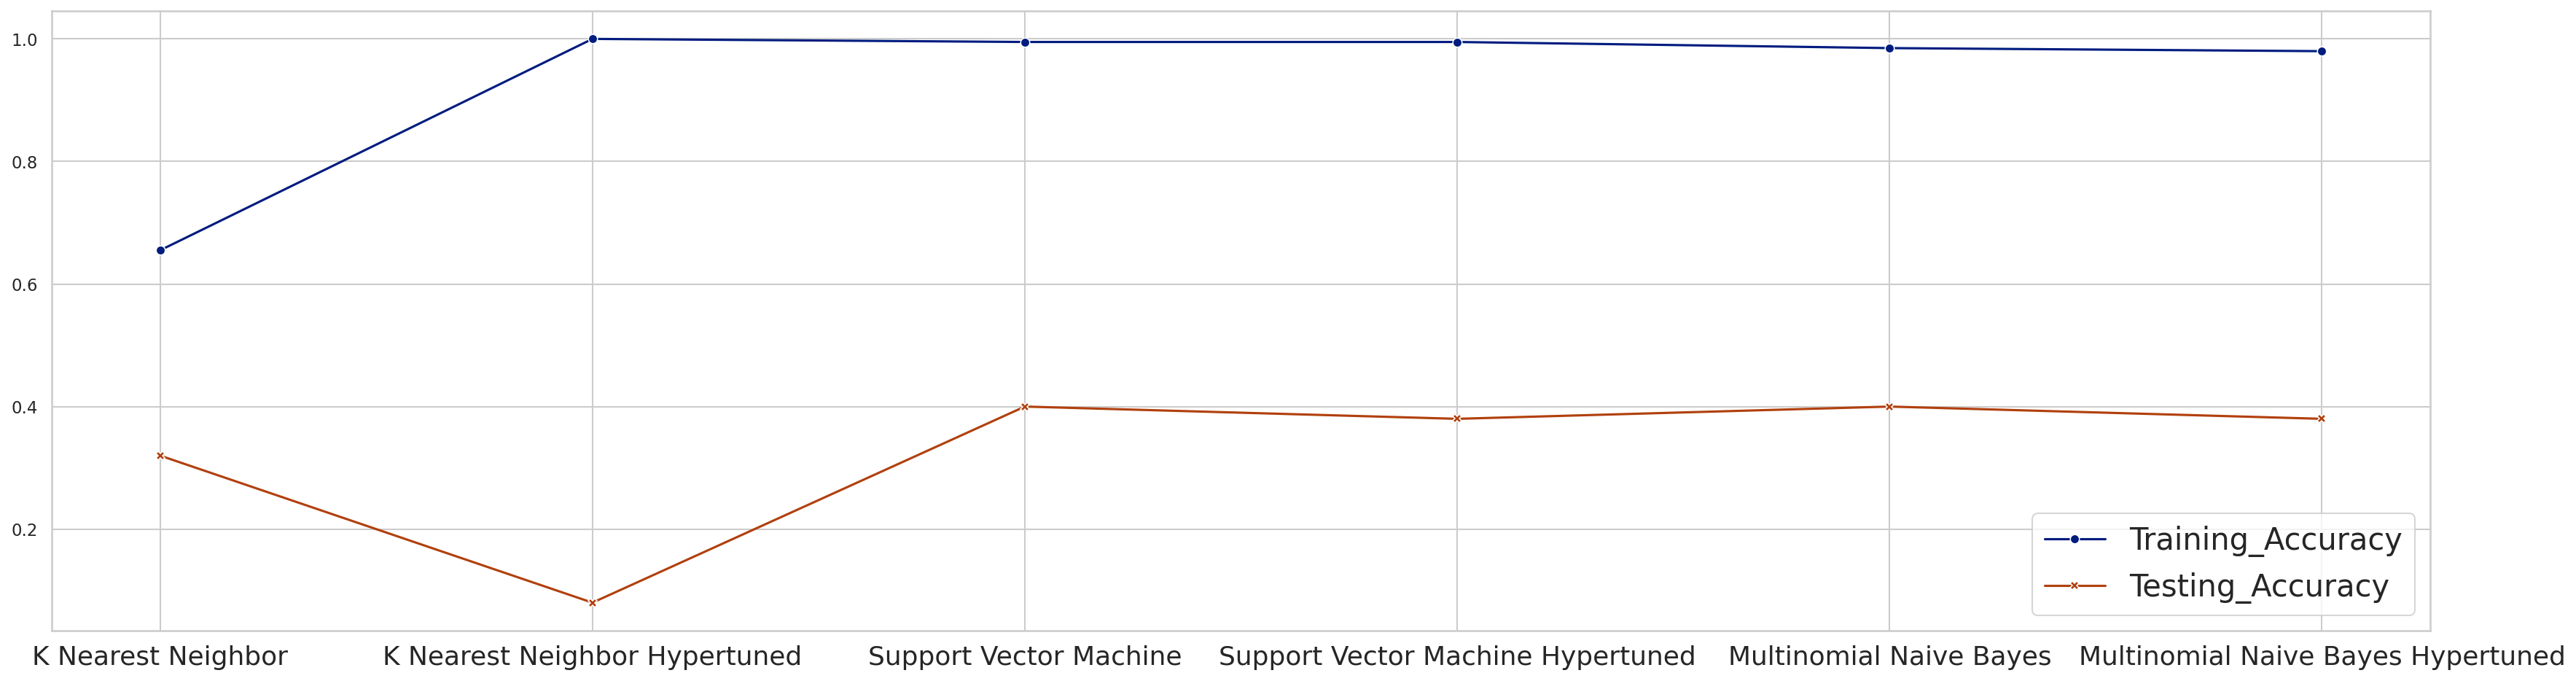

In [ ]:
ax = sns.lineplot(data=[all_model_acc_compare['Training_Accuracy'], all_model_acc_compare['Testing_Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(all_model_acc_compare['Algorithm'])))
ax.set_xticklabels(all_model_acc_compare['Algorithm'])


In [ ]:
all_precision_score.extend([metrics.precision_score(y_test, all_knn_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, all_knn_ht_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, all_svm_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, all_svm_ht_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, all_mnb_test_prediction,average="weighted")*100,
                            metrics.precision_score(y_test, all_mnb_ht_test_prediction,average="weighted")*100])

all_recall_score.extend([metrics.recall_score(y_test, all_knn_test_prediction,average="weighted")*100,
                         metrics.recall_score(y_test, all_knn_ht_test_prediction,average="weighted")*100,
                         metrics.recall_score(y_test, all_svm_test_prediction,average="weighted")*100,
                         metrics.recall_score(y_test, all_svm_ht_test_prediction,average="weighted")*100,
                         metrics.recall_score(y_test, all_mnb_test_prediction,average="weighted")*100,
                         metrics.recall_score(y_test, all_mnb_ht_test_prediction,average="weighted")*100])

all_f1_score.extend([metrics.f1_score(y_test, all_knn_test_prediction,average="weighted")*100,
                     metrics.f1_score(y_test, all_knn_ht_test_prediction,average="weighted")*100,
                     metrics.f1_score(y_test, all_svm_test_prediction,average="weighted")*100,
                     metrics.f1_score(y_test, all_svm_ht_test_prediction,average="weighted")*100,
                     metrics.f1_score(y_test, all_mnb_test_prediction,average="weighted")*100,
                     metrics.f1_score(y_test, all_mnb_ht_test_prediction,average="weighted")*100])
# displaying all the performance metrics
all_comp_metric = pd.DataFrame({'Model' : ['K Nearest Neighbor', 'K Nearest Neighbor Hypertuned', 'Support Vector Machine', 'Support Vector Machine Hypertuned', 'Multinomial Naive Bayes', 'Multinomial Naive Bayes Hypertuned'],
                       'Precision' : all_precision_score,
                       'Recall' : all_recall_score,
                       'F1' : all_f1_score,
                       'Test_Accuracy' : all_category_test_accuracy},
                       index=["", "", "","","","17 Indivudial Groups"])

all_comp_metric.sort_values(by='Test_Accuracy', ascending=False, inplace=True)
all_comp_metric


,Model,Precision,Recall,F1,Test_Accuracy
,Support Vector Machine,40.250903,40.0,36.033700,0.40
,Multinomial Naive Bayes,44.415584,40.0,34.232339,0.40
,Support Vector Machine Hypertuned,39.307692,38.0,36.104762,0.38
17 Indivudial Groups,Multinomial Naive Bayes Hypertuned,39.363636,38.0,37.852632,0.38
,K Nearest Neighbor,34.777489,32.0,30.375796,0.32
,K Nearest Neighbor Hypertuned,32.170213,8.0,7.437642,0.08


**Document Classification**

In [29]:
data = pd.read_excel("/content/dataNetworkwithClasses.xlsm")
data

,ID,Title,Content,Venue,Class
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,Monetization as a Motivator for the Freemium E...,The paper describes user behavior as a result ...,arXiv: Computers and Society,Cyberscience and Social Networks
1,086c091e-d905-4f1c-9385-eec41ad55723,Towards intelligent distributed computing : ce...,Distributed computing systems are of huge impo...,NaN,NaN
2,3089c330-983b-4d83-9b82-fdc7ba8b316c,Changes in Urban Area Discovered by Analysis o...,A period of almost 150 years (since the middle...,NaN,NaN
3,328ff460-ca4e-4f83-b100-0b3535b5f30a,A Survey of Social Web Mining Applications for...,The final publication is available at Springer...,NaN,NaN
4,38f94267-fdf2-4c45-b930-df351b7fc6a8,Quantized Control and Data-Rate Constraints,This article briefly describes the topic of qu...,NaN,NaN
...,...,...,...,...,...
994,504ef98c-fc58-41cf-bfd9-cb691ab0ffc3,A Rubric to Enrich Student Writing and Underst...,"The importance of effective communication, bot...",NaN,NaN
995,505388b0-b20b-42a3-9a0d-be31d7a22e78,Computing Biological Model Parameters by Paral...,Biological models typically depend on many par...,international conference on bioinformatics and...,Information and Communication Technologies (ICT)
996,51023dcc-599d-44f8-9cc2-6b216d769336,Robust image hashing with embedding vector var...,We investigate the use of LLE in image hashing...,Digital Signal Processing,NaN
997,514105bd-5bd1-49db-a959-48cb99a13722,Migration of Cloud Services and Deliveries to ...,This paper discusses the adoption of cloud com...,NaN,NaN


In [30]:
#Elimination of rows containig classes
df_cleaned = data.dropna(subset=['Venue'])
clean_data = df_cleaned[pd.isna(df_cleaned['Class'])]
clean_data

,ID,Title,Content,Venue,Class
36,eaa2ca27-deab-43f5-89f5-ebf426e5e9cc,Discrete Control-Based Design of Adaptive and ...,This invited paper makes an overview of our wo...,international conference on distributed comput...,NaN
46,f2ee6802-d6ce-409e-9f5e-46793c573869,Wideband underwater sonar imaging via compress...,By exploiting the sparsity of the imaging scen...,Science in China Series F: Information Sciences,NaN
51,efd57554-653b-4fd1-ad98-6b46206acd19,Visualizing Collaborations and Online Social I...,The various ways of interacting with social me...,international world wide web conferences,NaN
52,0fb177bb-b263-4efd-a6c7-7d7afaa29705,Modeling and optimal torque control of a snake...,"For the snake-like robot with passive wheels, ...",Science in China Series F: Information Sciences,NaN
68,070578fc-2885-441e-87da-9e4b56cc09f6,Mathematical method in optical molecular imaging,Optical molecular imaging is an important tech...,Science in China Series F: Information Sciences,NaN
...,...,...,...,...,...
989,4f6bbbca-4e7e-4adb-b627-070f830dcc57,Construction of B-spline surface with B-spline...,This paper is concerned with construction of a...,Journal of Computational and Applied Mathematics,NaN
990,4fa236d4-a85a-454f-9971-2e864e624aac,Conceptual analysis and natural kinds: the cas...,There is a line of reasoning in metaepistemolo...,Synthese,NaN
992,4fc74166-c805-4b87-ba85-0417ce5cf4f6,Urban traffic flow forecasting through statist...,In this paper we show a hybrid modeling approa...,Neurocomputing,NaN
996,51023dcc-599d-44f8-9cc2-6b216d769336,Robust image hashing with embedding vector var...,We investigate the use of LLE in image hashing...,Digital Signal Processing,NaN


In [31]:
#Data with Classes
df_filtre = data[data['Class'].notnull()]
df_filtre

,ID,Title,Content,Venue,Class
0,04b38d22-d10c-4b84-8a9d-bd610400aa4e,Monetization as a Motivator for the Freemium E...,The paper describes user behavior as a result ...,arXiv: Computers and Society,Cyberscience and Social Networks
5,5927b230-d977-4cac-b159-c893f92275ad,A general framework for fast stagewise algorithms,Forward stagewise regression follows a very si...,Journal of Machine Learning Research,Artificial Intelligence and Machine Learning
7,8aea70f8-b6c3-40c2-8aa6-bf5e114637a7,Off-Grid DOA Estimation Based on Analysis of t...,Spatial compressive sensing (SCS) has recently...,IEICE Transactions on Fundamentals of Electron...,Information and Communication Technologies (ICT)
9,b38e7118-7da7-443f-9aef-5d6c15168bbd,Elementary Teachers' Perceptions of Technology...,Despite the availability of technological reso...,International Journal of Strategic Information...,Information and Communication Technologies (ICT)
12,24583b3c-cd2a-4171-a2d8-4fdccbeefdbb,On Mobile Bluetooth Tags,This paper presents a new approach for hyper-l...,arXiv: Networking and Internet Architecture,Information and Communication Technologies (ICT)
...,...,...,...,...,...
901,40a01303-e875-4f83-8b84-e9be7bf26bd5,Do It Yourself: Examination of Self-Injury Fir...,Abstract Individuals who engage in nonsuicidal...,"Cyberpsychology, Behavior, and Social Networking",Cyberscience and Social Networks
904,415a8ab1-cc85-497e-a0eb-3fcc6e45fc2e,Modeling neural activity with cumulative damag...,Neurons transmit information as action potenti...,Biological Cybernetics,Cyberscience and Social Networks
942,4819c9e1-679a-4381-b593-e2e17730a88f,Robust linear pose graph-based SLAM,This paper addresses a robust and efficient so...,Robotics and Autonomous Systems,Robotics and Embedded Systems
984,4ea6f1cb-7815-4ef9-93e2-efe58976b06d,Probabilistische Methode zur Modellierung des ...,In diesem Beitrag wird eine neue probabilistis...,Elektrotechnik Und Informationstechnik,Information and Communication Technologies (ICT)


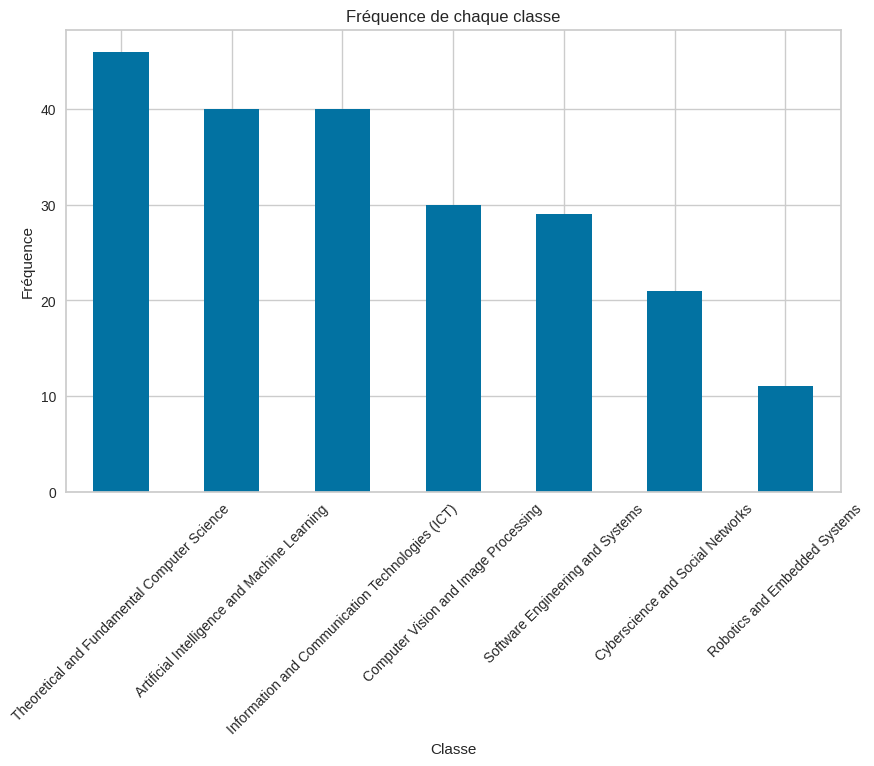

In [32]:
class_frequency = df_filtre['Class'].value_counts()
plt.figure(figsize=(10, 6))
class_frequency.plot(kind='bar')
plt.title('Fréquence de chaque classe')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

In [33]:
class_frequency

Theoretical and Fundamental Computer Science        46
Artificial Intelligence and Machine Learning        40
Information and Communication Technologies (ICT)    40
Computer Vision and Image Processing                30
Software Engineering and Systems                    29
Cyberscience and Social Networks                    21
Robotics and Embedded Systems                       11
Name: Class, dtype: int64

In [8]:
#Data Set Splitting
def split_dataset(df_filtre, test_size, valid_size):

    train_df, test_valid_df = train_test_split(df_filtre, test_size=test_size, random_state=42)


    test_df, valid_df = train_test_split(test_valid_df, test_size=valid_size/(1-test_size), random_state=42)

    return train_df, test_df, valid_df

train_df, test_df, valid_df = split_dataset(df_filtre, test_size=0.3, valid_size=0.25)

train_df.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)
valid_df.reset_index(inplace=True, drop=True)

# Display splitting results
N_train = train_df.shape[0]
N_test = test_df.shape[0]
N_valid = valid_df.shape[0]

print("Train set : %d elements, Test set : %d elements, Validation set : %d elements" % (N_train, N_test, N_valid))


Train set : 151 elements, Test set : 42 elements, Validation set : 24 elements


In [9]:
#Preparing data for modeling

# Delete ID , Title and Content
df_filtre.drop(columns=["ID", "Title", "Content"], inplace=True)

#Data Cleansing
def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Elimination of stop words and putting on lowercases
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]

    # Stemmatization
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(token) for token in tokens]

    return ' '.join(stemmed)

df_filtre['Venue'] = df_filtre['Venue'].apply(clean_text)
df_filtre

,Venue,Class
0,arxiv comput societi,Cyberscience and Social Networks
5,journal machin learn research,Artificial Intelligence and Machine Learning
7,ieic transact fundament electron commun comput...,Information and Communication Technologies (ICT)
9,intern journal strateg inform technolog applic,Information and Communication Technologies (ICT)
12,arxiv network internet architectur,Information and Communication Technologies (ICT)
...,...,...
901,cyberpsycholog behavior social network,Cyberscience and Social Networks
904,biolog cybernet,Cyberscience and Social Networks
942,robot autonom system,Robotics and Embedded Systems
984,elektrotechnik und informationstechnik,Information and Communication Technologies (ICT)


Comparing Different Models

In [10]:
!pip install --upgrade pycaret

In [11]:
from pycaret.classification import *

In [12]:
%time
setup(data = df_filtre, target = 'Class')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


,Description,Value
0,Session id,3802
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"Artificial Intelligence and Machine Learning: 0, Computer Vision and Image Processing: 1, Cyberscience and Social Networks: 2, Information and Communication Technologies (ICT): 3, Robotics and Embedded Systems: 4, Software Engineering and Systems: 5, Theoretical and Fundamental Computer Science: 6"
4,Original data shape,"(217, 2)"
5,Transformed data shape,"(217, 2)"
6,Transformed train set shape,"(151, 2)"
7,Transformed test set shape,"(66, 2)"
8,Categorical features,1
9,Preprocess,True


In [13]:
%time
compare_models(sort='Accuracy',n_select = 5)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.06 µs


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,0.1250
dt,Decision Tree Classifier,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,0.1240
rf,Random Forest Classifier,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,0.4040
gbc,Gradient Boosting Classifier,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,1.4480
et,Extra Trees Classifier,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,0.3450
xgboost,Extreme Gradient Boosting,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,0.1670
lightgbm,Light Gradient Boosting Machine,0.5967,0.0000,0.5967,0.6754,0.5780,0.5139,0.5795,0.2530
nb,Naive Bayes,0.4975,0.0000,0.4975,0.4968,0.4483,0.3926,0.4430,0.1090
qda,Quadratic Discriminant Analysis,0.4975,0.0000,0.4975,0.4968,0.4483,0.3926,0.4430,0.0880
lda,Linear Discriminant Analysis,0.4112,0.0000,0.4112,0.3429,0.3330,0.2817,0.3309,0.1590


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=3802, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jo

Training of models giving best Accuracy and F1-score

Précision: 0.7083333333333334
                                                  precision    recall  f1-score   support

    Artificial Intelligence and Machine Learning       0.75      1.00      0.86         3
            Computer Vision and Image Processing       1.00      0.75      0.86         4
                Cyberscience and Social Networks       1.00      0.25      0.40         4
Information and Communication Technologies (ICT)       0.50      1.00      0.67         3
                   Robotics and Embedded Systems       1.00      1.00      1.00         1
                Software Engineering and Systems       1.00      0.60      0.75         5
    Theoretical and Fundamental Computer Science       0.50      0.75      0.60         4

                                        accuracy                           0.71        24
                                       macro avg       0.82      0.76      0.73        24
                                    weighted avg       0.82      0.7

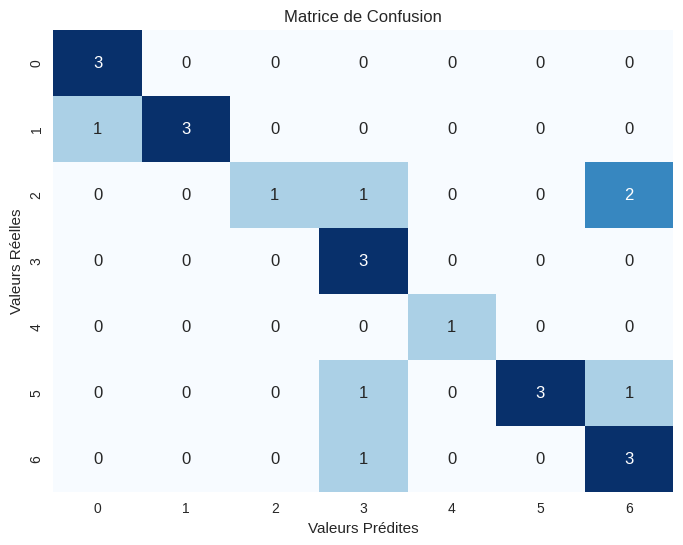

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

# Définition des données d'entraînement et de validation
y_train = train_df["Class"]
y_test = valid_df["Class"]

x_train = train_df["Venue"]
x_val = valid_df["Venue"]


modelGB = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=8513, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_val = vectorizer.transform(x_val)

modelGB.fit(x_train, y_train)

predictions = modelGB.predict(x_val)


# Évaluer la précision
accuracy = accuracy_score(y_test, predictions)
print(f"Précision: {accuracy}")

# Rapport de classification
report = classification_report(y_test, predictions)
print(report)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()


Précision: 0.75
                                                  precision    recall  f1-score   support

    Artificial Intelligence and Machine Learning       0.75      1.00      0.86         3
            Computer Vision and Image Processing       1.00      0.75      0.86         4
                Cyberscience and Social Networks       1.00      0.25      0.40         4
Information and Communication Technologies (ICT)       0.75      1.00      0.86         3
                   Robotics and Embedded Systems       1.00      1.00      1.00         1
                Software Engineering and Systems       1.00      0.60      0.75         5
    Theoretical and Fundamental Computer Science       0.50      1.00      0.67         4

                                        accuracy                           0.75        24
                                       macro avg       0.86      0.80      0.77        24
                                    weighted avg       0.85      0.75      0.73   

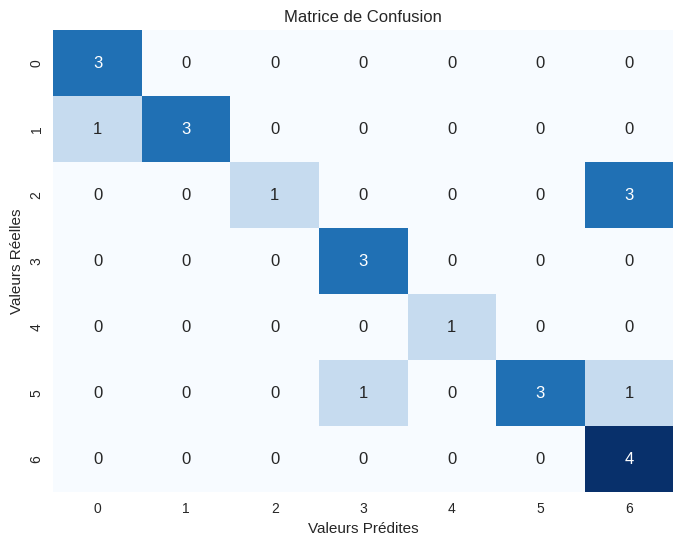

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Définition des données d'entraînement et de validation
y_train = train_df["Class"]
y_test = valid_df["Class"]

x_train = train_df["Venue"]
x_val = valid_df["Venue"]


modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=3158, splitter='best')

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_val = vectorizer.transform(x_val)

modelDT.fit(x_train, y_train)

predictions = modelDT.predict(x_val)

# Évaluer la précision
accuracy = accuracy_score(y_test, predictions)
print(f"Précision: {accuracy}")

# Rapport de classification
report = classification_report(y_test, predictions)
print(report)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

Précision: 0.75
                                                  precision    recall  f1-score   support

    Artificial Intelligence and Machine Learning       1.00      1.00      1.00         3
            Computer Vision and Image Processing       1.00      1.00      1.00         4
                Cyberscience and Social Networks       0.50      0.25      0.33         4
Information and Communication Technologies (ICT)       0.60      1.00      0.75         3
                   Robotics and Embedded Systems       1.00      1.00      1.00         1
                Software Engineering and Systems       1.00      0.60      0.75         5
    Theoretical and Fundamental Computer Science       0.50      0.75      0.60         4

                                        accuracy                           0.75        24
                                       macro avg       0.80      0.80      0.78        24
                                    weighted avg       0.78      0.75      0.74   

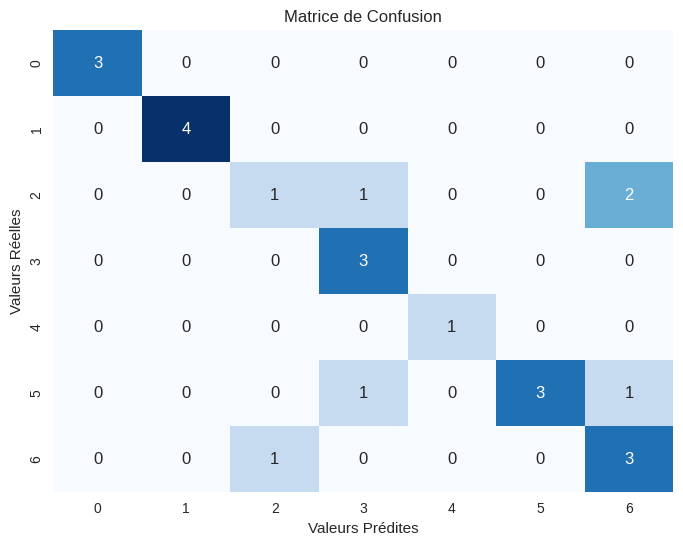

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Définition des données d'entraînement et de validation
y_train = train_df["Class"]
y_test = valid_df["Class"]

x_train = train_df["Venue"]
x_val = valid_df["Venue"]


modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=3158, verbose=0,
                        warm_start=False)


vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_val = vectorizer.transform(x_val)

modelRF.fit(x_train, y_train)

predictions = modelRF.predict(x_val)

# Évaluer la précision
accuracy = accuracy_score(y_test, predictions)
print(f"Précision: {accuracy}")

# Rapport de classification
report = classification_report(y_test, predictions)
print(report)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

Précision: 0.7083333333333334
                                                  precision    recall  f1-score   support

    Artificial Intelligence and Machine Learning       0.75      1.00      0.86         3
            Computer Vision and Image Processing       1.00      1.00      1.00         4
                Cyberscience and Social Networks       0.50      0.25      0.33         4
Information and Communication Technologies (ICT)       0.60      1.00      0.75         3
                   Robotics and Embedded Systems       0.00      0.00      0.00         1
                Software Engineering and Systems       1.00      0.60      0.75         5
    Theoretical and Fundamental Computer Science       0.75      0.75      0.75         4

                                        accuracy                           0.71        24
                                       macro avg       0.66      0.66      0.63        24
                                    weighted avg       0.75      0.7

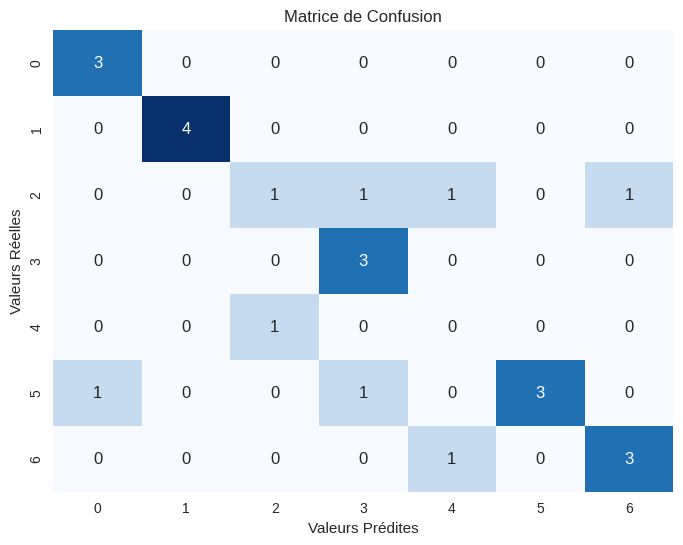

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


# Définition des données d'entraînement et de validation
y_train = train_df["Class"]
y_test = valid_df["Class"]

x_train = train_df["Venue"]
x_val = valid_df["Venue"]


modelKNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')


vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_val = vectorizer.transform(x_val)

modelKNN.fit(x_train, y_train)

predictions = modelKNN.predict(x_val)

from sklearn.metrics import accuracy_score, classification_report

# Évaluer la précision
accuracy = accuracy_score(y_test, predictions)
print(f"Précision: {accuracy}")

# Rapport de classification
report = classification_report(y_test, predictions)
print(report)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()



Applying predictions on the rest of our datset ( the 603 articles without classes)

In [34]:
x_new = vectorizer.transform(clean_data["Venue"])

predictions = modelDT.predict(x_new)
clean_data["Class"]= predictions
clean_data


,ID,Title,Content,Venue,Class
36,eaa2ca27-deab-43f5-89f5-ebf426e5e9cc,Discrete Control-Based Design of Adaptive and ...,This invited paper makes an overview of our wo...,international conference on distributed comput...,Information and Communication Technologies (ICT)
46,f2ee6802-d6ce-409e-9f5e-46793c573869,Wideband underwater sonar imaging via compress...,By exploiting the sparsity of the imaging scen...,Science in China Series F: Information Sciences,Information and Communication Technologies (ICT)
51,efd57554-653b-4fd1-ad98-6b46206acd19,Visualizing Collaborations and Online Social I...,The various ways of interacting with social me...,international world wide web conferences,Information and Communication Technologies (ICT)
52,0fb177bb-b263-4efd-a6c7-7d7afaa29705,Modeling and optimal torque control of a snake...,"For the snake-like robot with passive wheels, ...",Science in China Series F: Information Sciences,Information and Communication Technologies (ICT)
68,070578fc-2885-441e-87da-9e4b56cc09f6,Mathematical method in optical molecular imaging,Optical molecular imaging is an important tech...,Science in China Series F: Information Sciences,Information and Communication Technologies (ICT)
...,...,...,...,...,...
989,4f6bbbca-4e7e-4adb-b627-070f830dcc57,Construction of B-spline surface with B-spline...,This paper is concerned with construction of a...,Journal of Computational and Applied Mathematics,Theoretical and Fundamental Computer Science
990,4fa236d4-a85a-454f-9971-2e864e624aac,Conceptual analysis and natural kinds: the cas...,There is a line of reasoning in metaepistemolo...,Synthese,Theoretical and Fundamental Computer Science
992,4fc74166-c805-4b87-ba85-0417ce5cf4f6,Urban traffic flow forecasting through statist...,In this paper we show a hybrid modeling approa...,Neurocomputing,Cyberscience and Social Networks
996,51023dcc-599d-44f8-9cc2-6b216d769336,Robust image hashing with embedding vector var...,We investigate the use of LLE in image hashing...,Digital Signal Processing,Artificial Intelligence and Machine Learning


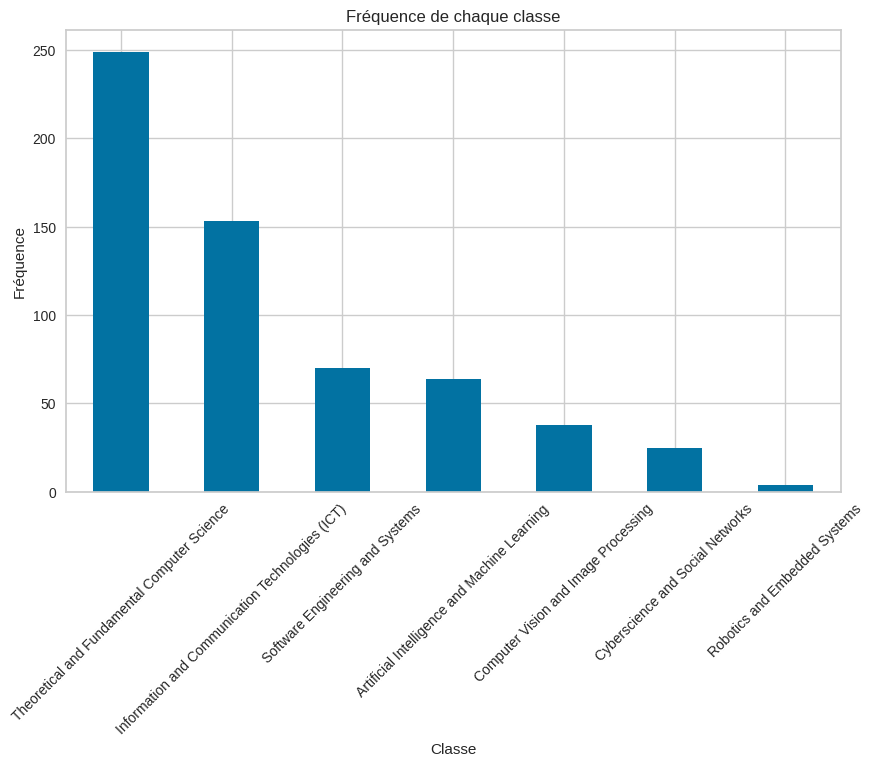

In [35]:
class_frequency = clean_data['Class'].value_counts()
plt.figure(figsize=(10, 6))
class_frequency.plot(kind='bar')
plt.title('Fréquence de chaque classe')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

In [36]:
class_frequency

Theoretical and Fundamental Computer Science        249
Information and Communication Technologies (ICT)    153
Software Engineering and Systems                     70
Artificial Intelligence and Machine Learning         64
Computer Vision and Image Processing                 38
Cyberscience and Social Networks                     25
Robotics and Embedded Systems                         4
Name: Class, dtype: int64

**GNN :**

In [49]:
!pip install torch torchvision torchaudio

In [50]:
!pip install torch-geometric

In [109]:
articles_df = pd.read_excel('/content/dataNetworkwithClasses.xlsm')
relations_df = pd.read_excel('/content/cited articles.xlsx')


In [110]:
#data encoding
class_encoder = LabelEncoder()
labels_encoded = class_encoder.fit_transform(articles_df['Class'])

In [111]:
print(f"number of relations : {len(relations_df)}")


number of relations : 1048575


In [77]:
# Delete arcs with invalid ID
valid_node_ids = set(articles_df['ID'])
relations_df = relations_df[relations_df['Article'].isin(valid_node_ids) & relations_df['Cited Article'].isin(valid_node_ids)]


In [78]:
print(f"Nombre d'IDs uniques dans articles_df : {articles_df['ID'].nunique()}")
print(f"Nombre d'IDs uniques dans relations_df (Article) : {relations_df['Article'].nunique()}")
print(f"Nombre d'IDs uniques dans relations_df (Cited Article) : {relations_df['Cited Article'].nunique()}")


relations_df_filtered = relations_df[relations_df['Article'].isin(valid_node_ids) & relations_df['Cited Article'].isin(valid_node_ids)]

print(f"Nombre de relations avant le filtrage: {len(relations_df)}")
print(f"Nombre de relations après le filtrage: {len(relations_df_filtered)}")


Nombre d'IDs uniques dans articles_df : 999
Nombre d'IDs uniques dans relations_df (Article) : 16
Nombre d'IDs uniques dans relations_df (Cited Article) : 16
Nombre de relations avant le filtrage: 22
Nombre de relations après le filtrage: 22


In [90]:
# Convert data in numeric type
relations_df_filtered['Article'] = pd.to_numeric(relations_df_filtered['Article'], errors='coerce')
relations_df_filtered['Cited Article'] = pd.to_numeric(relations_df_filtered['Cited Article'], errors='coerce')

# delete null values
relations_df_filtered.dropna(inplace=True)

# create indexes for arcs
edge_index = torch.tensor([relations_df_filtered['Article'].values,
                           relations_df_filtered['Cited Article'].values], dtype=torch.long)
# create node vectors
vectorizer = TfidfVectorizer(max_features=128)
titles_tfidf = vectorizer.fit_transform(articles_df['Title']).toarray()
node_features = torch.tensor(titles_tfidf, dtype=torch.float)

data = Data(x=node_features, edge_index=edge_index)

labels = torch.tensor(labels_encoded, dtype=torch.long)

data.y = labels


In [93]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

# Initialise model
model = GCN(num_features=128, num_classes=len(np.unique(labels)))


In [94]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

#Split Data
data.train_mask = torch.rand(len(labels)) < 0.8

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}: Loss: {loss.item()}')


Epoch 1: Loss: 2.1003994941711426
Epoch 11: Loss: 1.4776004552841187
Epoch 21: Loss: 0.9849109053611755
Epoch 31: Loss: 1.0012394189834595
Epoch 41: Loss: 0.8934266567230225
Epoch 51: Loss: 0.8573303818702698
Epoch 61: Loss: 0.8168097734451294
Epoch 71: Loss: 0.8070797920227051
Epoch 81: Loss: 0.792892575263977
Epoch 91: Loss: 0.7786353826522827
Epoch 101: Loss: 0.7538902163505554
Epoch 111: Loss: 0.7277355790138245
Epoch 121: Loss: 0.7317429780960083
Epoch 131: Loss: 0.7279792428016663
Epoch 141: Loss: 0.6725969314575195
Epoch 151: Loss: 0.6872138977050781
Epoch 161: Loss: 0.6537372469902039
Epoch 171: Loss: 0.6483852863311768
Epoch 181: Loss: 0.6248279809951782
Epoch 191: Loss: 0.6189743876457214


Graph Visualisation

In [95]:
!pip install networkx matplotlib

In [96]:
model.eval()
with torch.no_grad():
    logits = model(data)
    predictions = logits.argmax(dim=1)


In [104]:
import networkx as nx
import matplotlib.pyplot as plt

# Create Graph
G = nx.Graph()
edge_index = data.edge_index.numpy()
for source, target in edge_index.T:
    G.add_edge(source, target)

color_map = [f"C{color}" for color in predictions.numpy()]  # "C0", "C1", etc., pour les couleurs matplotlib



In [106]:
for node in range(data.num_nodes):
    G.add_node(node)


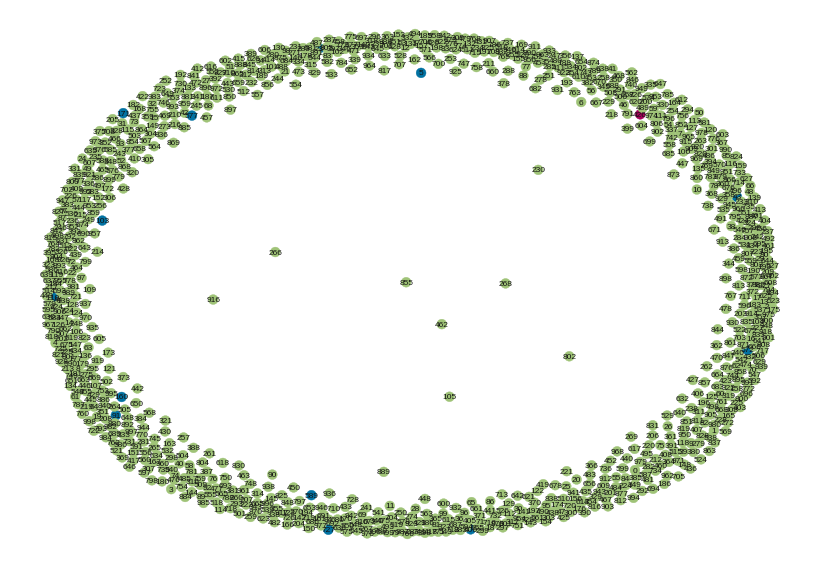

In [107]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=50, font_size=6)
